# Course Project DSCI 633

## DDOS Detection

## Problem Statement: To detect DDOS attack and identify the type of attack.

### Data Exploration

#### Importing dataset

In [1]:
import pandas as pd

In [2]:
colnames = ["duration","protocol_type","service","flag",
            "src_bytes","dst_bytes","land","wrong_fragment",
            "urgent","hot","num_failed_logins","logged_in",
            "num_compromised","root_shell","su_attempted",
            "num_root","num_file_creations","num_shells",
            "num_access_files","num_outbound_cmds",
            "is_host_login","is_guest_login","count",
            "srv_count","serror_rate","srv_serror_rate",
            "same_srv_rate","diff_srv_rate","srv_diff_host_rate",
            "una1","una2","dst_host_count","dst_host_srv_count",
            "dst_host_same_srv_rate","dst_host_diff_srv_rate",
            "dst_host_same_src_port_rate","dst_host_srv_diff_host_rate",
            "dst_host_serror_rate","dst_host_srv_serror_rate",
            "dst_host_rerror_rate","dst_host_srv_rerror_rate","result"]

In [3]:
dataset_1 = pd.read_csv('kddcup.data_10_percent_corrected',names=colnames)
dataset_2 = pd.read_csv('corrected',names=colnames)

In [4]:
corrected = pd.concat([dataset_1,dataset_2],axis=0)

#### First 5 rows of the dataset

In [5]:
corrected.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,result
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


#### Columns and rows count

In [6]:
print("Number of rows: ", corrected.shape[0])
print("Number of columns: ", corrected.shape[1])

Number of rows:  805050
Number of columns:  42


#### Checking null values in the dataset

In [7]:
corrected[pd.isnull(corrected).any(axis=1)]

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,result


Dataset has no null values

#### Prediction classes

In [8]:
print("Number of classes in prediction class: ", len(corrected['result'].unique()))
corrected['result'].unique()

Number of classes in prediction class:  40


array(['normal.', 'buffer_overflow.', 'loadmodule.', 'perl.', 'neptune.',
       'smurf.', 'guess_passwd.', 'pod.', 'teardrop.', 'portsweep.',
       'ipsweep.', 'land.', 'ftp_write.', 'back.', 'imap.', 'satan.',
       'phf.', 'nmap.', 'multihop.', 'warezmaster.', 'warezclient.',
       'spy.', 'rootkit.', 'snmpgetattack.', 'named.', 'xlock.',
       'xsnoop.', 'sendmail.', 'saint.', 'apache2.', 'udpstorm.',
       'xterm.', 'mscan.', 'processtable.', 'ps.', 'httptunnel.', 'worm.',
       'mailbomb.', 'sqlattack.', 'snmpguess.'], dtype=object)

#### This is a multi class classification problem, since we have 40 classes.

#### Checking duplicate data

In [9]:
print("Percentage of duplicate rows found: ", 
      (1 - corrected.drop_duplicates(subset=corrected.columns, keep='first').shape[0]/ corrected.shape[0]) * 100,
     "%")

Percentage of duplicate rows found:  73.2189305012111 %


#### Around 73% of data is duplicate, hence dropping duplicate rows.

In [10]:
corrected.drop_duplicates(subset=corrected.columns, keep='first',inplace=True)

In [11]:
print("Number of rows after removing duplicate records: ", corrected.shape[0])

Number of rows after removing duplicate records:  215601


### Data exploration

#### Checking distribution of output class

<AxesSubplot:title={'center':'Distribution of classes in result'}, xlabel='Subclasses', ylabel='Frequency count'>

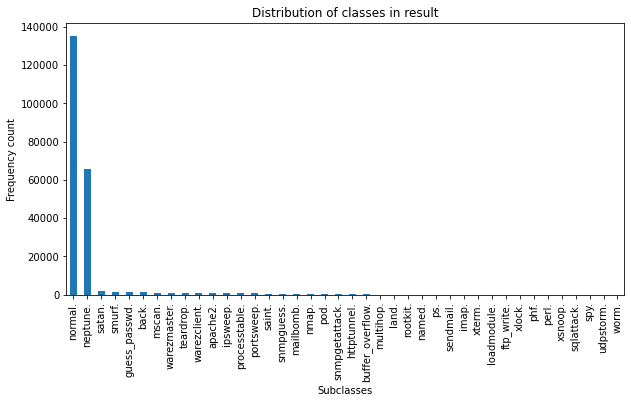

In [12]:
corrected['result'].value_counts().plot(kind ='bar',figsize = (10,5), 
                                        title= 'Distribution of classes in result',
                                        xlabel = 'Subclasses',
                                        ylabel='Frequency count')

#### It can be seen that the output class has 40 sub categories. This makes this a multi-class classification problem.

#### Checking percentage distribution of output class.

In [13]:
print("Percentage distribution of classes in the output classes.")
(corrected['result'].value_counts() / corrected.shape[0]) * 100

Percentage distribution of classes in the output classes.


normal.             62.771508
neptune.            30.431213
satan.               0.814004
smurf.               0.640999
guess_passwd.        0.628476
back.                0.618272
mscan.               0.486547
warezmaster.         0.474024
teardrop.            0.429961
warezclient.         0.414191
apache2.             0.368273
ipsweep.             0.346937
processtable.        0.345082
portsweep.           0.269479
saint.               0.168830
snmpguess.           0.166511
mailbomb.            0.142856
nmap.                0.110389
pod.                 0.105287
snmpgetattack.       0.083024
httptunnel.          0.067254
buffer_overflow.     0.024119
multihop.            0.011595
land.                0.011132
rootkit.             0.010668
named.               0.007885
ps.                  0.007421
sendmail.            0.006957
imap.                0.006030
xterm.               0.006030
loadmodule.          0.005102
ftp_write.           0.005102
xlock.               0.004174
phf.      

#### As per the above plot we can see that class `normal.` and `neptune.` has the highest distritbution. And rest all classes has the very low distribution. This makes it a class imbalance problem with multi class classification.

#### Checking type of data for all the features

In [14]:
numerical_attr = []
categorical_attr = []
for feature,datatype in zip(corrected.columns,corrected.dtypes):
    if datatype != 'object':
        numerical_attr.append(feature)
    else:
        categorical_attr.append(feature)
print("Numerical attributes: \n", numerical_attr)
print("\nNumerical attributes count: ", len(numerical_attr))
print("-"*50)
print("Categorical attributes: \n", categorical_attr)
print("\nCategorical attributes count: ", len(categorical_attr))

Numerical attributes: 
 ['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'una1', 'una2', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']

Numerical attributes count:  38
--------------------------------------------------
Categorical attributes: 
 ['protocol_type', 'service', 'flag', 'result']

Categorical attributes count:  4


#### The data has 38 numerical attributes and 4 categorical attributes.

#### Checking distribution of numerical features

In [15]:
corrected.loc[:,numerical_attr].describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,215601.000000,2.156010e+05,2.156010e+05,215601.000000,215601.000000,215601.000000,215601.000000,215601.000000,215601.000000,215601.000000,...,215601.000000,215601.000000,215601.000000,215601.000000,215601.000000,215601.000000,215601.000000,215601.000000,215601.000000,215601.000000
mean,114.518235,6.621398e+03,2.957882e+03,0.000116,0.014416,0.000107,0.081827,0.002699,0.540828,0.030510,...,178.081043,143.526194,0.606005,0.055959,0.088386,0.018167,0.218609,0.218432,0.131321,0.128572
std,1118.322841,1.503680e+06,5.356371e+04,0.010768,0.201815,0.014447,1.225385,0.055681,0.498331,3.596264,...,99.946140,114.235103,0.449320,0.144977,0.234827,0.056154,0.408912,0.410817,0.326935,0.328127
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,71.000000,13.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,2.000000e+02,2.600000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,194.000000,0.980000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.940000e+02,1.460000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.060000,0.030000,0.020000,0.010000,0.010000,0.000000,0.000000
max,58329.000000,6.933756e+08,5.203179e+06,1.000000,3.000000,3.000000,101.000000,5.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Functions to understand numerical features properties

In [16]:
def range_num(series):
    return series.max() - series.min()
def outliers(series):
    outliers_count = 0
    iqr = series.quantile(.75) - series.quantile(.25)
    iqr_upperbound = series.quantile(.75) + iqr*1.5
    iqr_lowerbound = series.quantile(.25) - iqr*1.5
    for oneValue in series.values:
        if oneValue > iqr_upperbound or oneValue < iqr_lowerbound:
            outliers_count += 1
    return outliers_count
def outliersPercentage(series):
    outliers_count = 0
    iqr = series.quantile(.75) - series.quantile(.25)
    iqr_upperbound = series.quantile(.75) + iqr*1.5
    iqr_lowerbound = series.quantile(.25) - iqr*1.5
    for oneValue in series.values:
        if oneValue > iqr_upperbound or oneValue < iqr_lowerbound:
            outliers_count += 1
    return (outliers_count/series.size) * 100
print("Summary for quantitative attributes.")
# using aggregate function to get mean, median, standard deviation and range
num_summary = corrected.agg(
    {
        col : ["mean", "median", "std", "min","max",range_num, outliers, outliersPercentage] for col in numerical_attr
    }
)
num_summary

Summary for quantitative attributes.


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
mean,114.518235,6.621398e+03,2.957882e+03,0.000116,0.014416,0.000107,0.081827,0.002699,0.540828,0.030510,...,178.081043,143.526194,0.606005,0.055959,0.088386,0.018167,0.218609,0.218432,0.131321,0.128572
median,0.000000,2.000000e+02,2.600000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,194.000000,0.980000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
std,1118.322841,1.503680e+06,5.356371e+04,0.010768,0.201815,0.014447,1.225385,0.055681,0.498331,3.596264,...,99.946140,114.235103,0.449320,0.144977,0.234827,0.056154,0.408912,0.410817,0.326935,0.328127
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,58329.000000,6.933756e+08,5.203179e+06,1.000000,3.000000,3.000000,101.000000,5.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
range_num,58329.000000,6.933756e+08,5.203179e+06,1.000000,3.000000,3.000000,101.000000,5.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
outliers,15761.000000,1.863300e+04,2.874500e+04,25.000000,1202.000000,14.000000,3104.000000,557.000000,0.000000,1378.000000,...,0.000000,0.000000,0.000000,9991.000000,35816.000000,14340.000000,51164.000000,48365.000000,38912.000000,35530.000000
outliersPercentage,7.310263,8.642353e+00,1.333250e+01,0.011595,0.557511,0.006493,1.439696,0.258348,0.000000,0.639144,...,0.000000,0.000000,0.000000,4.634023,16.612168,6.651175,23.730873,22.432642,18.048154,16.479515


#### It is observed that some numerical features have outliers based on IQR.

#### Columns with range greater than 1

In [17]:
num_standardization_cols = []
for col in num_summary.columns:
    if num_summary.loc['range_num',col] > 1:
        num_standardization_cols.append(col)

print("Numbers of columns with range greater than 1: ", len(num_standardization_cols))
num_standardization_cols

Numbers of columns with range greater than 1:  17


['duration',
 'src_bytes',
 'dst_bytes',
 'wrong_fragment',
 'urgent',
 'hot',
 'num_failed_logins',
 'num_compromised',
 'su_attempted',
 'num_root',
 'num_file_creations',
 'num_shells',
 'num_access_files',
 'count',
 'srv_count',
 'dst_host_count',
 'dst_host_srv_count']

#### From summary of numerical attributes following are the obervations.
* Data has potential outlier based on IQR.
* 10 columns have range of 1 i.e. we can skip standardization for these attributes.
* Rest columns can be standardized.

#### Checking distribution of categorical features

In [19]:
for col in categorical_attr:
    print(corrected[col].value_counts()/corrected.shape[0]*100)

tcp     90.580749
udp      7.788925
icmp     1.630326
Name: protocol_type, dtype: float64
http        47.420467
private     28.656175
smtp         6.166483
domain_u     3.675308
ftp_data     2.889133
              ...    
urh_i        0.006493
tim_i        0.004174
tftp_u       0.000928
icmp         0.000928
red_i        0.000464
Name: service, Length: 67, dtype: float64
SF        65.107769
S0        21.683573
REJ       11.523138
RSTO       0.901666
RSTR       0.528291
S3         0.131725
SH         0.052875
S1         0.038961
S2         0.021336
RSTOS0     0.006030
OTH        0.004638
Name: flag, dtype: float64
normal.             62.771508
neptune.            30.431213
satan.               0.814004
smurf.               0.640999
guess_passwd.        0.628476
back.                0.618272
mscan.               0.486547
warezmaster.         0.474024
teardrop.            0.429961
warezclient.         0.414191
apache2.             0.368273
ipsweep.             0.346937
processtable.      

#### Visualizing categorical attributes distribution

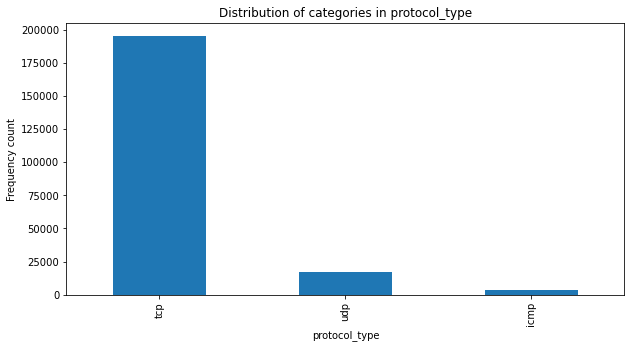

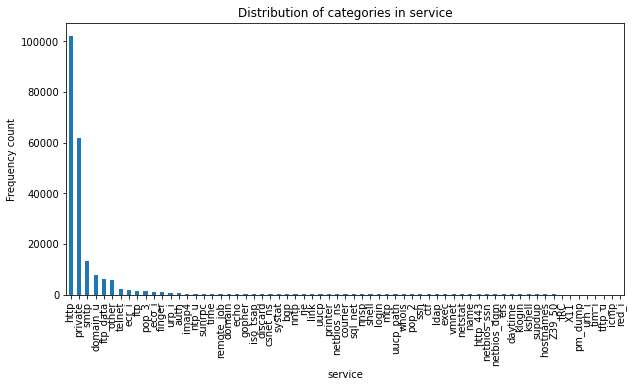

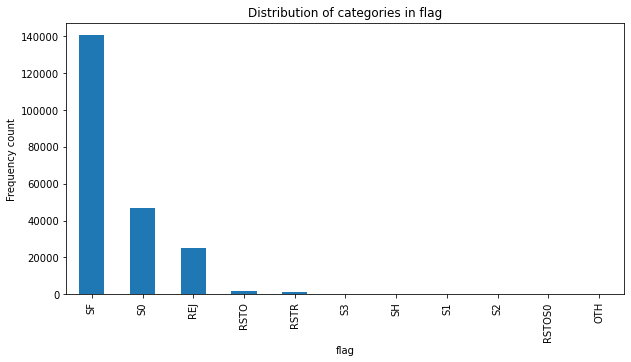

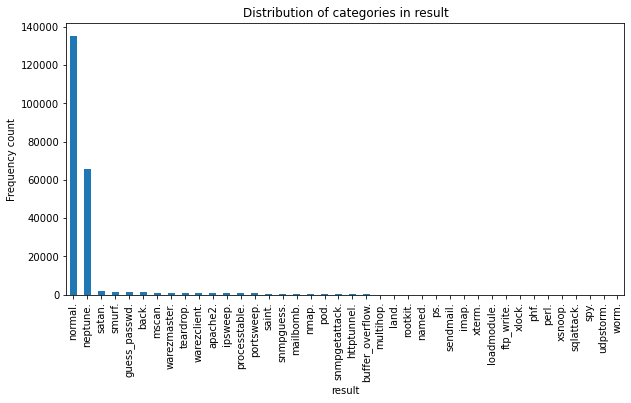

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
for col in categorical_attr:
    corrected[col].value_counts().plot(kind ='bar',figsize = (10,5), 
                                        title= 'Distribution of categories in ' + col,
                                        xlabel = col,
                                        ylabel='Frequency count')
    plt.show()

#### It can be seen that categorical data is highly imbalanced.
* In `protocol_type`, `tcp` has the highest distribution, and rest other classes have very low ditribution.
* In `service`, `http` and `private` has the highest distribution, and rest other classes have very low ditribution.
* In `flag`, `S0` and `SF` has the highest distribution, and rest other classes have very low ditribution.
* In `result`, `normal.` and `neptune.` has the highest distribution, and rest other classes have very low ditribution.

#### Subcategories count in categorical data

In [21]:
for col in categorical_attr:
    print("Subcategories in ", col, " : ", len(corrected[col].unique()))
    print("-"*40)

Subcategories in  protocol_type  :  3
----------------------------------------
Subcategories in  service  :  67
----------------------------------------
Subcategories in  flag  :  11
----------------------------------------
Subcategories in  result  :  40
----------------------------------------


#### For the columns `service` and `flag` has high number of subcategorices. On preprocessing these categorical attributes by converting them to numerical value using one hot encoding will result in adding a column per subcategory. In this case it would result in adding `67 + 11 + 3  - 3 = 78` columns. This would add to the complexity of the model. We will use baseN encoding which will highly reduce the dimentionality as the value of N is increased.

### Feature selection

#### Checking correlation for the features

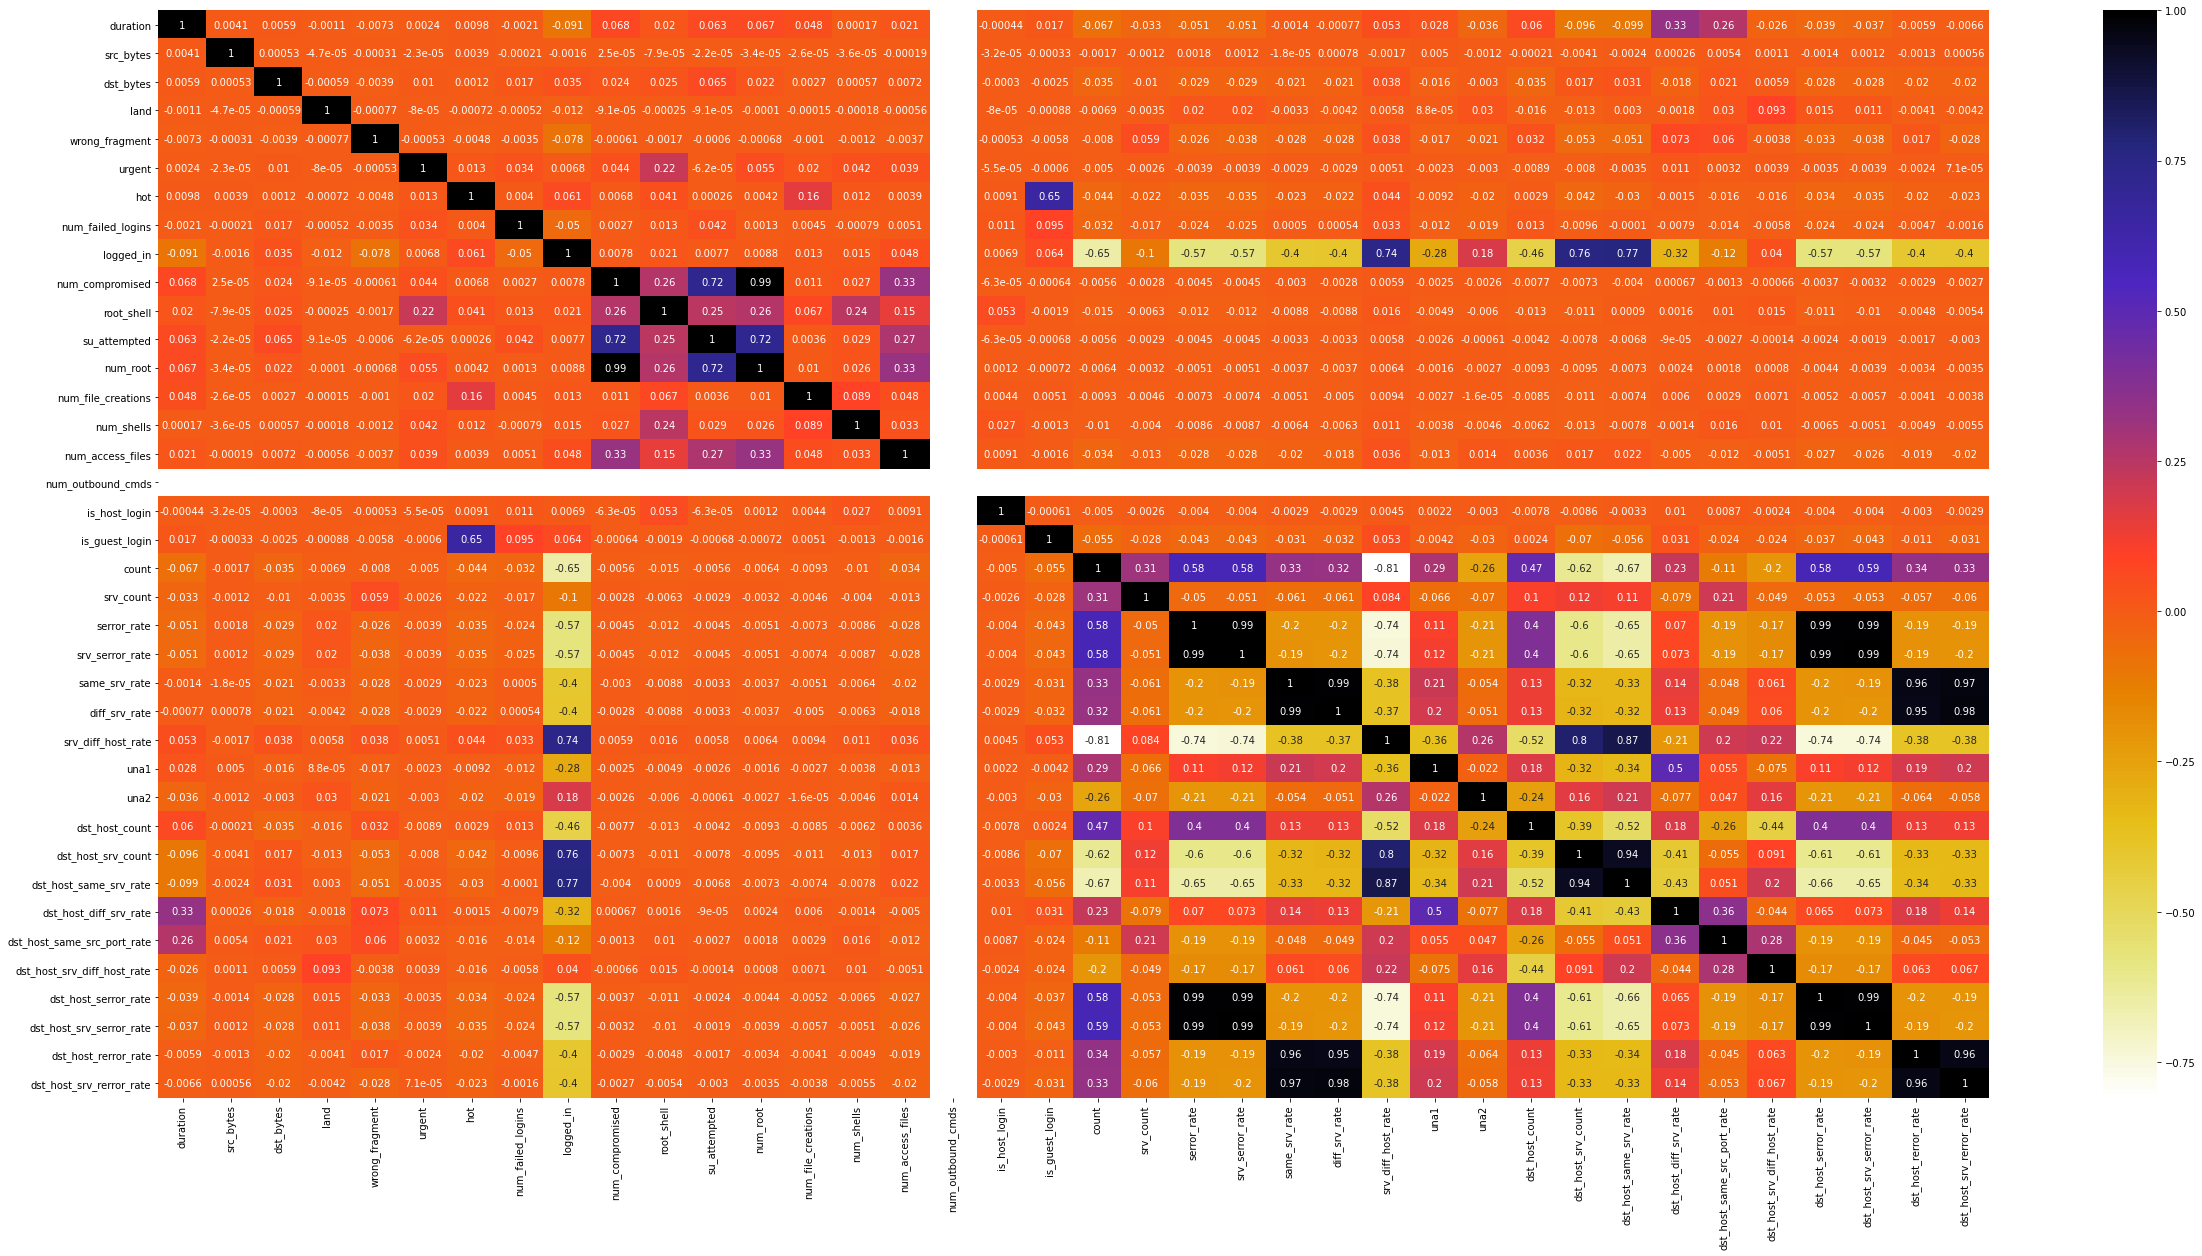

In [23]:
import seaborn as sns
plt.figure(figsize=(41,20))
cor = corrected.corr()
sns.heatmap(cor,annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

#### As per the correlation matrix above we can eliminate pairs with high correlation and consider only one feature from the pair of highly correlated features. For this problem we are using threshold correlation of 0.8.

In [24]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

#### Highly correlated feature from their pair

In [25]:
corr_features = correlation(corrected, 0.8)
print("Number of highly correlated pairs: ",len(set(corr_features)))
print("-"*40)
print("One feature from each highly correlated pair: \n", corr_features)

Number of highly correlated pairs:  9
----------------------------------------
One feature from each highly correlated pair: 
 {'srv_serror_rate', 'dst_host_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_count', 'num_root', 'dst_host_srv_serror_rate', 'dst_host_srv_rerror_rate', 'dst_host_same_srv_rate', 'diff_srv_rate'}


#### Removing these features for model training

In [26]:
for col in numerical_attr:
    if col in corr_features:
        numerical_attr.remove(col)

for col in num_standardization_cols:
    if col in corr_features:
        num_standardization_cols.remove(col)

In [27]:
print("Numerical attributes after removing highly correlated featured: ", len(numerical_attr))

Numerical attributes after removing highly correlated featured:  32


In [28]:
print("Numerical attributes for standardization after removing highly correlated featured: ", len(num_standardization_cols))

Numerical attributes for standardization after removing highly correlated featured:  15


### Preprocessing the data

#### Creating pipeline for categorical data preprocessing

In [29]:
from sklearn.pipeline import Pipeline
import category_encoders as ce
categorical_attr_encoding = categorical_attr
categorical_attr_encoding.remove('result')
categorical_transformer = Pipeline(
    steps=[("base_encoding",ce.BaseNEncoder(base=2))])

#### Creating pipeline for numerical data preprocessing

In [30]:
from sklearn.preprocessing import StandardScaler
numeric_transformer = Pipeline(
    steps=[("scaler", StandardScaler())]
)

#### Creating full pipeline with numerical and categorical preprocessing

In [31]:
from sklearn.compose import ColumnTransformer
full_pipeline = ColumnTransformer(transformers=[
        ("num", numeric_transformer, num_standardization_cols),
        ("cat", categorical_transformer, categorical_attr_encoding),
        ("passthrough", "passthrough", list(set(numerical_attr) - set(num_standardization_cols)))
    ])

#### Transforming the data

In [32]:
df_tf = full_pipeline.fit_transform(corrected)

#### Shape of the transformed data

In [33]:
print("Number of rows: ",df_tf.shape[0])
print("Number of columns: ",df_tf.shape[1])

Number of rows:  215601
Number of columns:  45


#### Splitting the data into test and train

In [34]:
from sklearn.model_selection import StratifiedShuffleSplit
ss = StratifiedShuffleSplit(test_size=0.2,random_state=42,n_splits=1)

In [35]:
X_train, X_test, y_train, y_test = (None, None, None, None)
for train_index, test_index in ss.split(df_tf, corrected['result']):
    X_train, X_test = df_tf[train_index], df_tf[test_index]
    y_train, y_test = corrected['result'].iloc[train_index], corrected['result'].iloc[test_index]

####  Data distribution after stratified sampling

In [52]:
print("Percentage distribution in train split: ", (X_train.shape[0]/corrected.shape[0])*100)
print("-"*40)
print("Percentage distribution in test split: ", (X_test.shape[0]/corrected.shape[0])*100)
print("-"*40)
print("Percentage classes distribution on train split:\n",(y_train.value_counts()/corrected.shape[0])*100)
print("-"*40)
print("Percentage classes distribution on test split:\n",(y_test.value_counts()/corrected.shape[0])*100)

Percentage distribution in train split:  79.99962894420712
----------------------------------------
Percentage distribution in test split:  20.000371055792876
----------------------------------------
Percentage classes distribution on train split:
 normal.             50.216836
neptune.            24.344971
satan.               0.651203
smurf.               0.512985
guess_passwd.        0.502781
back.                0.494432
mscan.               0.389145
warezmaster.         0.379405
teardrop.            0.344154
warezclient.         0.331167
apache2.             0.294526
ipsweep.             0.277364
processtable.        0.275973
portsweep.           0.215676
saint.               0.134972
snmpguess.           0.133116
mailbomb.            0.114100
nmap.                0.088126
pod.                 0.084415
snmpgetattack.       0.066326
httptunnel.          0.053803
buffer_overflow.     0.019480
multihop.            0.009276
land.                0.008813
rootkit.             0.008349
n

#### Creating a dictionary of result subclasses with oversampled distribution. Oversampling minority classes with distribution of less than 1% to 2%. We are not oversampling minority class to match the distribution of majority class, as in our case the percentage distribution of minority class is less than 2%. Hence oversampling would not be appropirate.

In [49]:
result_distribution = y_train.value_counts().to_dict()
total_result_count = y_train.shape[0]
unique_counts = len(y_train.unique())
for key,value in result_distribution.items():
    if value/total_result_count < 0.01:
        result_distribution[key] = int(0.02 * total_result_count)

#### Desired distribution of output classes after sampling

In [50]:
result_distribution

{'normal.': 108268,
 'neptune.': 52488,
 'satan.': 3449,
 'smurf.': 3449,
 'guess_passwd.': 3449,
 'back.': 3449,
 'mscan.': 3449,
 'warezmaster.': 3449,
 'teardrop.': 3449,
 'warezclient.': 3449,
 'apache2.': 3449,
 'ipsweep.': 3449,
 'processtable.': 3449,
 'portsweep.': 3449,
 'saint.': 3449,
 'snmpguess.': 3449,
 'mailbomb.': 3449,
 'nmap.': 3449,
 'pod.': 3449,
 'snmpgetattack.': 3449,
 'httptunnel.': 3449,
 'buffer_overflow.': 3449,
 'multihop.': 3449,
 'land.': 3449,
 'rootkit.': 3449,
 'named.': 3449,
 'ps.': 3449,
 'sendmail.': 3449,
 'imap.': 3449,
 'xterm.': 3449,
 'loadmodule.': 3449,
 'ftp_write.': 3449,
 'xlock.': 3449,
 'phf.': 3449,
 'perl.': 3449,
 'xsnoop.': 3449,
 'sqlattack.': 3449,
 'spy.': 3449,
 'udpstorm.': 3449,
 'worm.': 3449}

#### Oversampling the data

#### Using SMOTE based oversampling which will create synthetic data points for minority class using KNN. 

In [56]:
from imblearn.over_sampling import SMOTE, ADASYN,RandomOverSampler
from imblearn.combine import SMOTETomek
from collections import Counter
from imblearn.pipeline import Pipeline

counter = Counter(y_train)
print("before: ",counter)
smote = SMOTE(sampling_strategy=result_distribution,n_jobs=-1,random_state=0)
ros = RandomOverSampler(sampling_strategy=result_distribution,random_state=0)
pipe = Pipeline([('randomoversampler',ros),('smote',smote)])
X_train,y_train = pipe.fit_resample(X_train,y_train)
counter = Counter(y_train)
print("after: ",counter)

before:  Counter({'normal.': 108268, 'neptune.': 52488, 'mscan.': 3449, 'processtable.': 3449, 'back.': 3449, 'teardrop.': 3449, 'satan.': 3449, 'httptunnel.': 3449, 'smurf.': 3449, 'snmpguess.': 3449, 'mailbomb.': 3449, 'apache2.': 3449, 'warezclient.': 3449, 'portsweep.': 3449, 'snmpgetattack.': 3449, 'guess_passwd.': 3449, 'ipsweep.': 3449, 'pod.': 3449, 'warezmaster.': 3449, 'sendmail.': 3449, 'saint.': 3449, 'multihop.': 3449, 'buffer_overflow.': 3449, 'ps.': 3449, 'perl.': 3449, 'nmap.': 3449, 'rootkit.': 3449, 'xterm.': 3449, 'loadmodule.': 3449, 'ftp_write.': 3449, 'land.': 3449, 'xlock.': 3449, 'imap.': 3449, 'named.': 3449, 'spy.': 3449, 'udpstorm.': 3449, 'xsnoop.': 3449, 'sqlattack.': 3449, 'worm.': 3449, 'phf.': 3449})
after:  Counter({'normal.': 108268, 'neptune.': 52488, 'mscan.': 3449, 'processtable.': 3449, 'back.': 3449, 'teardrop.': 3449, 'satan.': 3449, 'httptunnel.': 3449, 'smurf.': 3449, 'snmpguess.': 3449, 'mailbomb.': 3449, 'apache2.': 3449, 'warezclient.': 3449

### Training the model

#### Creating functions for model evaluation

In [57]:
def compute_FPR_TRP(y_true,y_pred):
    ''' 
    This function computes fpr and tpr. It first converts the multi-class
    output to binary i.e. normal and attack. After converting it into binary
    classes, the fpr and tpr is computed and returned.
    '''
    # Converting multi-class to binary class of actual output
    y_true_relabeled = [ "normal" if res == "normal." else "attack" for res in y_true]
    # Converting multi-class to binary class of predicted output
    y_pred_relabeled = [ "normal" if res == "normal." else "attack" for res in y_pred]
    
    # Computing tn,fp, fn and tp using confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_true_relabeled,y_pred_relabeled).ravel()
    
    # Calculating tpr
    tpr = tp/(tp + fn)
    # Calculating fpr
    fpr = fp/(fp + tn)
    
    # return tuple consisting of tpr and fpr
    return (tpr,fpr)

def model_fpr(y_true,y_pred):
    '''
    This function computes fpr and tpr. It first converts the multi-class
    output to binary i.e. normal and attack. After converting it into binary
    classes, the fpr is computed and returned.
    '''
    # calling compute_FPR_TRP function to get tpr and fpr
    tpr,fpr = compute_FPR_TRP(y_true,y_pred)
    return fpr

def model_tpr(y_true,y_pred):
    '''
    This function computes fpr and tpr. It first converts the multi-class
    output to binary i.e. normal and attack. After converting it into binary
    classes, the tpr is computed and returned.
    '''
    # calling compute_FPR_TRP function to get tpr and fpr
    tpr,fpr = compute_FPR_TRP(y_true,y_pred)
    return tpr

In [58]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, precision_score, recall_score, f1_score,classification_report, plot_confusion_matrix,make_scorer
from sklearn.model_selection import cross_validate
import pprint
def modelEvaluation(classifier,X_train,X_test,y_train,y_test,hypertuned=False):
    '''
    This function evaluates a model.
    It predicts the output class on train data and test data, and computes classification
    report for it.
    It also computes the fpr and tpr for the train and test data.
    And finally perform cross-validation to check model generalization performance.
    It returns dictionary of the evaluation metrics for train, test and cross-validation.
    '''
    
    # Using pprint library to print dictionary in more readable format 
    pp = pprint.PrettyPrinter(depth=4)
    
    # Predicting output classes for train data
    y_pred_train = classifier.predict(X_train)
    print("-"*40)
    
    print("Classification report on train data.")
    # Printing classification report for train data.
    print(classification_report(y_train,y_pred_train))
    print("-"*40)
    
    # Printing precision score on train data with average parameter as 
    # 'weighted' to consider class imbalance
    print("Precision score on training data: ",precision_score(y_train,y_pred_train,average = 'weighted'))
    print("-"*40)
    
    print("Confusion matrix on train data")
    # Using matplotlib to set figure size, this will be passed plot_confusion_matrix method
    # to adjust plot size.
    fig, ax = plt.subplots(figsize=(40, 20))
    # Plotting confusion matrix for train data
    plot_confusion_matrix(classifier,X_train,y_train,ax=ax)
    plt.show()
    print("-"*40)
    
    # Predicting output for test data
    y_pred_test = classifier.predict(X_test)
    print("Classification report on test data.")
    
    # Printing classification report for train data.
    print(classification_report(y_test,y_pred_test))
    print("-"*40)
    
    # Printing precision score on train data with average parameter as 
    # 'weighted' to consider class imbalance
    print("Precision score on test data: ",precision_score(y_test,y_pred_test,average = 'weighted'))
    print("-"*40)
    
    print("Confusion matrix on test data")
    # Using matplotlib to set figure size, this will be passed plot_confusion_matrix method
    # to adjust plot size.
    fig, ax = plt.subplots(figsize=(40, 20))
    plot_confusion_matrix(classifier,X_test,y_test,ax=ax)
    plt.show()
    print("-"*40)
    
    # Computing fpr and tpr on train data
    tpr,fpr = compute_FPR_TRP(y_train,y_pred_train)
    
    print("-"*40)
    
    # Printing fpr and tpr for train data
    print("TPR on train data: ", tpr)
    print("FPR on train data: ", fpr)
    print("-"*40)
    
    # Computing fpr and tpr on test data
    tpr_test,fpr_test = compute_FPR_TRP(y_test,y_pred_test)
    
    print("-"*40)
    # Printing fpr and tpr for test data
    print("TPR on test data: ", tpr_test)
    print("FPR on test data: ", fpr_test)
    print("-"*40)
    
    
    # Defining dictionary for scoring metrics for cross valiation
    scoring = {'precision': make_scorer(precision_score,average = 'weighted',zero_division=0), 
               'recall': make_scorer(recall_score, average = 'weighted',zero_division=0),
               'accuracy': make_scorer(accuracy_score), 
               'f1': make_scorer(f1_score,average='weighted',zero_division=0),
               'fpr': make_scorer(model_fpr),
               'tpr': make_scorer(model_tpr)}
    
    # Applying cross validation to get model generalisation performance
    cv_res = cross_validate(classifier,
                            X_train,
                            y_train,
                            cv=5,
                            scoring=scoring,
                            return_train_score=True,
                            n_jobs=-1)
    
    # pretty printing cross-validation report
    pp.pprint(cv_res)
    
    # Flag to check if model is hypertuned to append '_hypertuned' as suffix to model name
    # to distinguish model name in the output
    if hypertuned:
        model_name = str(classifier.__class__.__name__) + "_hypertuned"
    else:
        model_name = str(classifier.__class__.__name__)
        
    # Generating result dictionary with model performance metrics
    result = {'model': model_name,
              'train_accuracy': accuracy_score(y_train,y_pred_train),
              'train_precision': precision_score(y_train,y_pred_train,average='weighted',zero_division=0),
              'train_recall': recall_score(y_train,y_pred_train,average='weighted',zero_division=0),
              'train_f1': f1_score(y_train,y_pred_train,average='weighted',zero_division=0),
              'train_fpr': model_fpr(y_train,y_pred_train),
              'train_tpr': model_tpr(y_train,y_pred_train),
              'test_accuracy': accuracy_score(y_test,y_pred_test),
              'test_precision': precision_score(y_test,y_pred_test,average='weighted',zero_division=0),
              'test_recall': recall_score(y_test,y_pred_test,average='weighted',zero_division=0),
              'test_f1': f1_score(y_test,y_pred_test,average='weighted',zero_division=0),
              'test_fpr': model_fpr(y_test,y_pred_test),
              'test_tpr': model_tpr(y_test,y_pred_test),
              'test_cv_accuracy': sum(cv_res['test_accuracy'])/len(cv_res['test_accuracy']),
              'test_cv_precision': sum(cv_res['test_precision'])/len(cv_res['test_precision']),
              'test_cv_recall': sum(cv_res['test_recall'])/len(cv_res['test_recall']),
              'test_cv_f1': sum(cv_res['test_f1'])/len(cv_res['test_f1']),
              'test_cv_fpr': sum(cv_res['test_fpr'])/len(cv_res['test_fpr']),
              'test_cv_tpr': sum(cv_res['test_tpr'])/len(cv_res['test_tpr'])
              }
    
    # return result
    return result
    
    
    

In [59]:
from sklearn.model_selection import GridSearchCV
def hypertune_model(classifier,parameters,X_train,X_test,y_train,y_test):
    '''
    This function hypertune the classifier based on parameters provided
    on the train data. And it further evaluates the best model using
    cross validation.
    '''
    
    # Scoring metrics dictionary
    scoring = {'precision': make_scorer(precision_score,average = 'weighted',zero_division=0), 
               'recall': make_scorer(recall_score, average = 'weighted',zero_division=0),
               'fpr': make_scorer(model_fpr,greater_is_better=False)}
    
    # Applying grid search with cv as 5 and refitting on 'fpr' metrics
    grid_search = GridSearchCV(classifier, parameters, cv=5,
                               scoring=scoring,
                               return_train_score=True,
                               n_jobs=-1,
                               refit="recall")
    
    # Fitting training data on the gridsearch object
    grid_search.fit(X_train, y_train)

    # Printing best parameters of the model
    print("Best params for ",classifier.__class__.__name__,":")
    print(grid_search.best_params_)
    print("-"*40)

    # Saving the best model
    hypertune_best_classifier = grid_search.best_estimator_
    
    # returning tuple of best model, best parameters and dictionary of mode
    return (hypertune_best_classifier,grid_search.best_params_,modelEvaluation(hypertune_best_classifier,X_train,X_test,y_train,y_test,True))



In [60]:
def calculate_hyperparameters_combinations(params):
    '''
    This function computes the total possible combinations of 
    hyperparameters based on input parameters.
    '''
    count = 1
    for param in params.values():
        count = count * len(param)
    print("-"*40)
    print(count)
    print("-"*40)
    return count

#### Train on decision tree

In [61]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='gini', splitter='best',class_weight='balanced',random_state=42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=42)

----------------------------------------
Classification report on train data.
                  precision    recall  f1-score   support

        apache2.       1.00      1.00      1.00      3449
           back.       1.00      1.00      1.00      3449
buffer_overflow.       1.00      1.00      1.00      3449
      ftp_write.       1.00      1.00      1.00      3449
   guess_passwd.       1.00      1.00      1.00      3449
     httptunnel.       1.00      1.00      1.00      3449
           imap.       1.00      1.00      1.00      3449
        ipsweep.       1.00      1.00      1.00      3449
           land.       1.00      1.00      1.00      3449
     loadmodule.       1.00      1.00      1.00      3449
       mailbomb.       1.00      1.00      1.00      3449
          mscan.       1.00      1.00      1.00      3449
       multihop.       1.00      1.00      1.00      3449
          named.       1.00      1.00      1.00      3449
        neptune.       1.00      1.00      1.00    

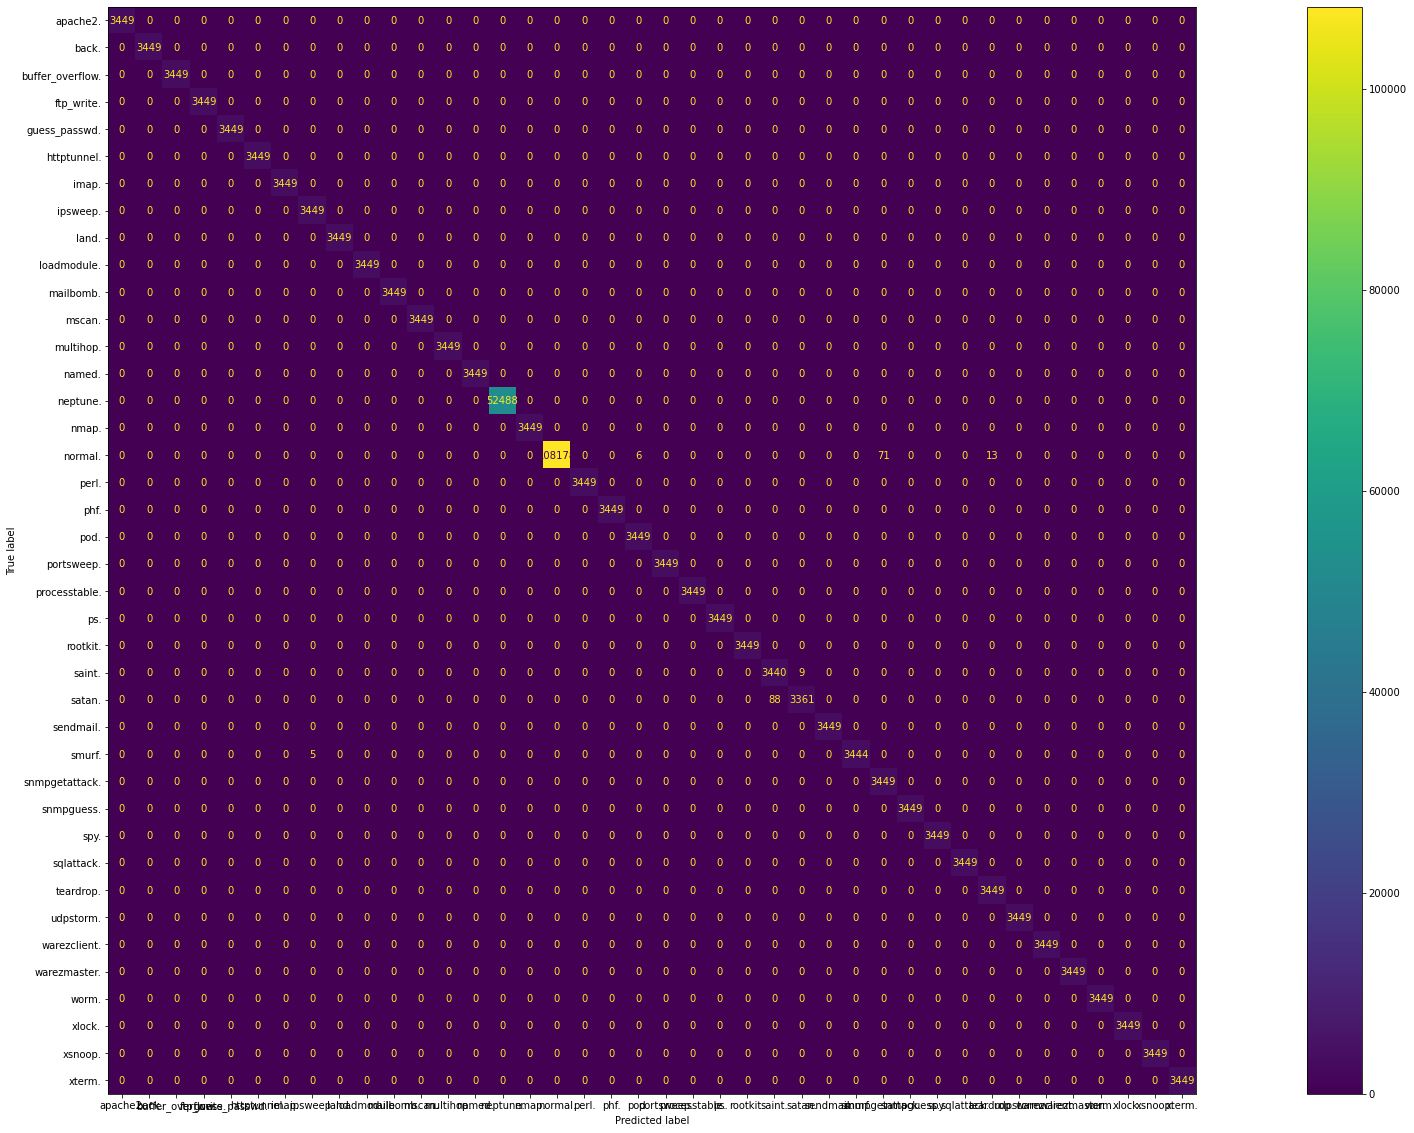

----------------------------------------
Classification report on test data.
                  precision    recall  f1-score   support

        apache2.       0.99      0.99      0.99       159
           back.       1.00      1.00      1.00       267
buffer_overflow.       0.54      0.70      0.61        10
      ftp_write.       0.33      0.50      0.40         2
   guess_passwd.       0.97      1.00      0.98       271
     httptunnel.       1.00      0.93      0.96        29
           imap.       0.60      1.00      0.75         3
        ipsweep.       0.98      0.99      0.98       150
           land.       1.00      1.00      1.00         5
     loadmodule.       0.00      0.00      0.00         2
       mailbomb.       1.00      1.00      1.00        62
          mscan.       0.98      0.98      0.98       210
       multihop.       0.14      0.20      0.17         5
          named.       0.67      0.67      0.67         3
        neptune.       1.00      1.00      1.00     

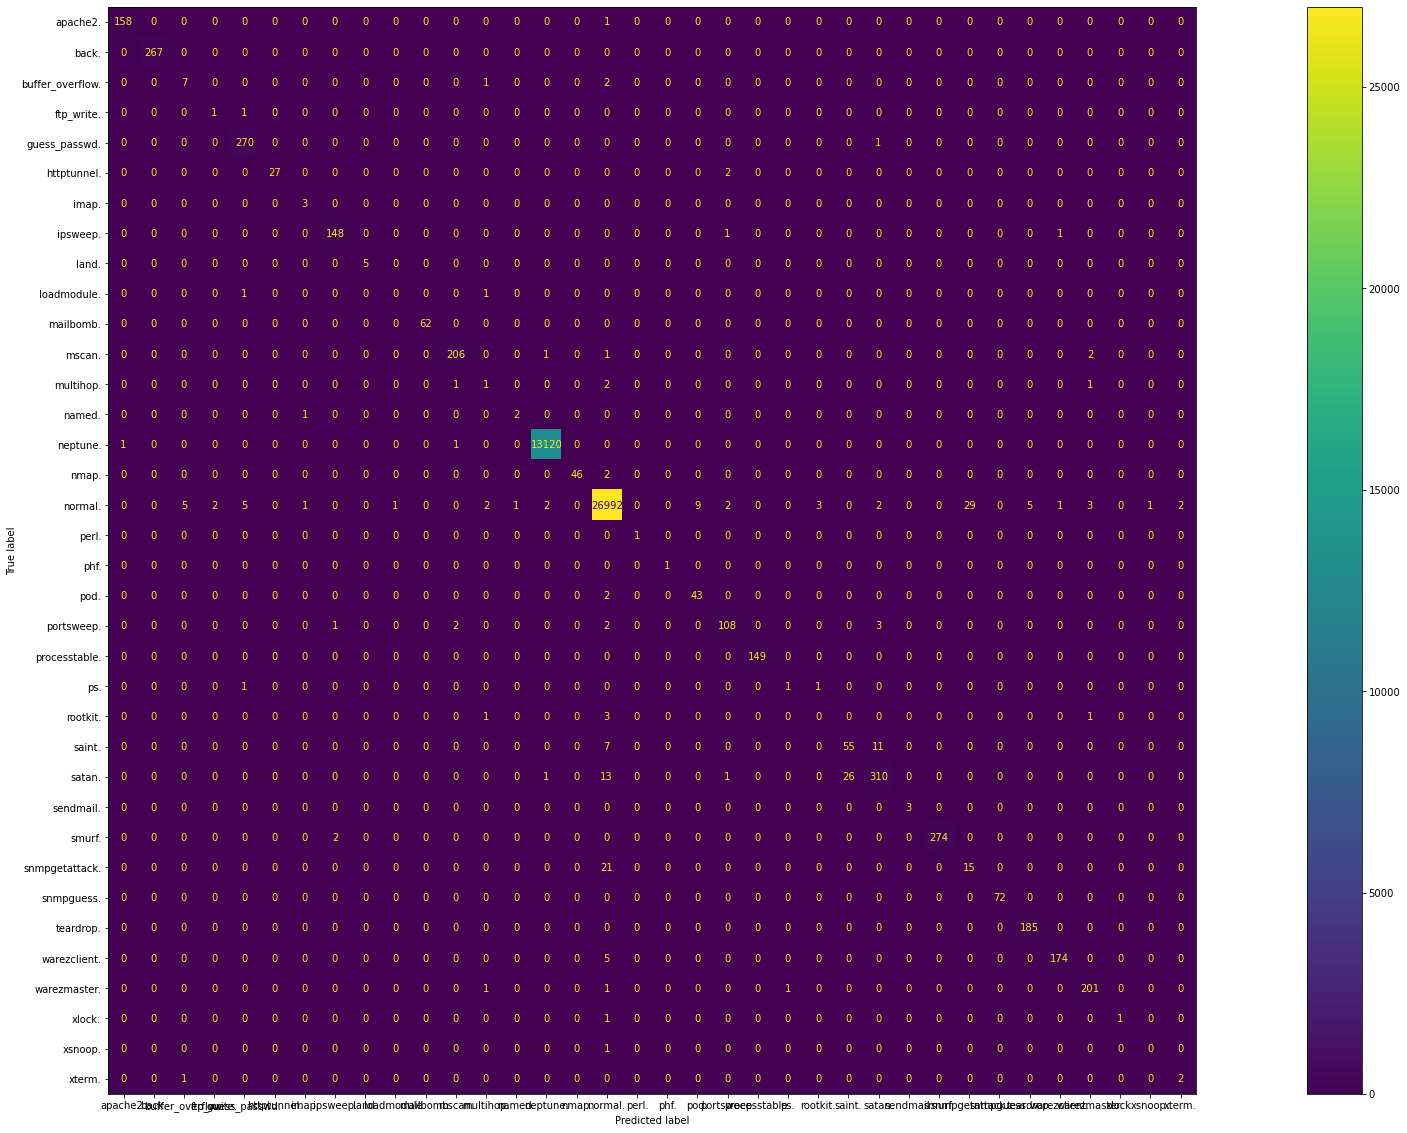

----------------------------------------
----------------------------------------
TPR on train data:  0.9991687294491447
FPR on train data:  0.0
----------------------------------------
----------------------------------------
TPR on test data:  0.9971922565390867
FPR on test data:  0.0039867937457173114
----------------------------------------
{'fit_time': array([3.40218925, 3.33219242, 3.44119239, 3.6181891 , 3.52718997]),
 'score_time': array([0.96012831, 0.97212672, 0.92312574, 0.93113089, 0.90312791]),
 'test_accuracy': array([0.99821808, 0.99842369, 0.99820095, 0.99845793, 0.99857787]),
 'test_f1': array([0.99822281, 0.99842547, 0.9982058 , 0.99846485, 0.99858168]),
 'test_fpr': array([2.72405339e-04, 1.36202670e-04, 5.44810678e-05, 2.72405339e-05,
       2.72405339e-05]),
 'test_precision': array([0.99824305, 0.99844794, 0.99822713, 0.99848905, 0.99859873]),
 'test_recall': array([0.99821808, 0.99842369, 0.99820095, 0.99845793, 0.99857787]),
 'test_tpr': array([0.99695206, 0.996

In [62]:
decision_tree_evaluation = modelEvaluation(dt,X_train,X_test,y_train,y_test)

#### Creating dataframe of model performance for model comparison

In [63]:
models_performance = pd.DataFrame(decision_tree_evaluation,index=[0])
models_performance

,model,train_accuracy,train_precision,train_recall,train_f1,train_fpr,train_tpr,test_accuracy,test_precision,test_recall,test_f1,test_fpr,test_tpr,test_cv_accuracy,test_cv_precision,test_cv_recall,test_cv_f1,test_cv_fpr,test_cv_tpr
0,DecisionTreeClassifier,0.999342,0.999353,0.999342,0.999343,0.0,0.999169,0.995107,0.995355,0.995107,0.995193,0.003987,0.997192,0.998376,0.998401,0.998376,0.99838,0.000104,0.996934


#### Observations for decision tree model
* Decision tree trained model has high test accuracy, with precision and recall score on train data.
* Train set results are not considered for model evaluation.
* Cross validation is used to evaluate the model generalization performance.
* Based on cross validation model shows similar performance compared to train result.
* FPR on cross validation is good `0.000104`, as our goal is to minimize the FPR and balance between precision and recall.
* Even on test set the model has low FPR and high precision and recall value.
* Decision tree trained model is performing really good.

#### Hypertuning decision tree

In [64]:
param_grid_dt = {'criterion': ['gini', 'entropy'], 
     'splitter': ["best", "random"],
     'max_depth': [None,5, 10, 20, 50, 100, 500],
     'min_samples_split': [2 ,5, 10, 100, 500],
     'class_weight': ['balanced']
    }
  
# print total model that will be trained for hyperparameters
calculate_hyperparameters_combinations(param_grid_dt)

----------------------------------------
140
----------------------------------------


140

#### Hypertuning decision tree with 140 combinations of hyperparameters

Best params for  DecisionTreeClassifier :
{'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'splitter': 'best'}
----------------------------------------
----------------------------------------
Classification report on train data.
                  precision    recall  f1-score   support

        apache2.       1.00      1.00      1.00      3449
           back.       1.00      1.00      1.00      3449
buffer_overflow.       1.00      1.00      1.00      3449
      ftp_write.       1.00      1.00      1.00      3449
   guess_passwd.       1.00      1.00      1.00      3449
     httptunnel.       1.00      1.00      1.00      3449
           imap.       1.00      1.00      1.00      3449
        ipsweep.       1.00      1.00      1.00      3449
           land.       1.00      1.00      1.00      3449
     loadmodule.       1.00      1.00      1.00      3449
       mailbomb.       1.00      1.00      1.00      3449
          mscan.       1.00  

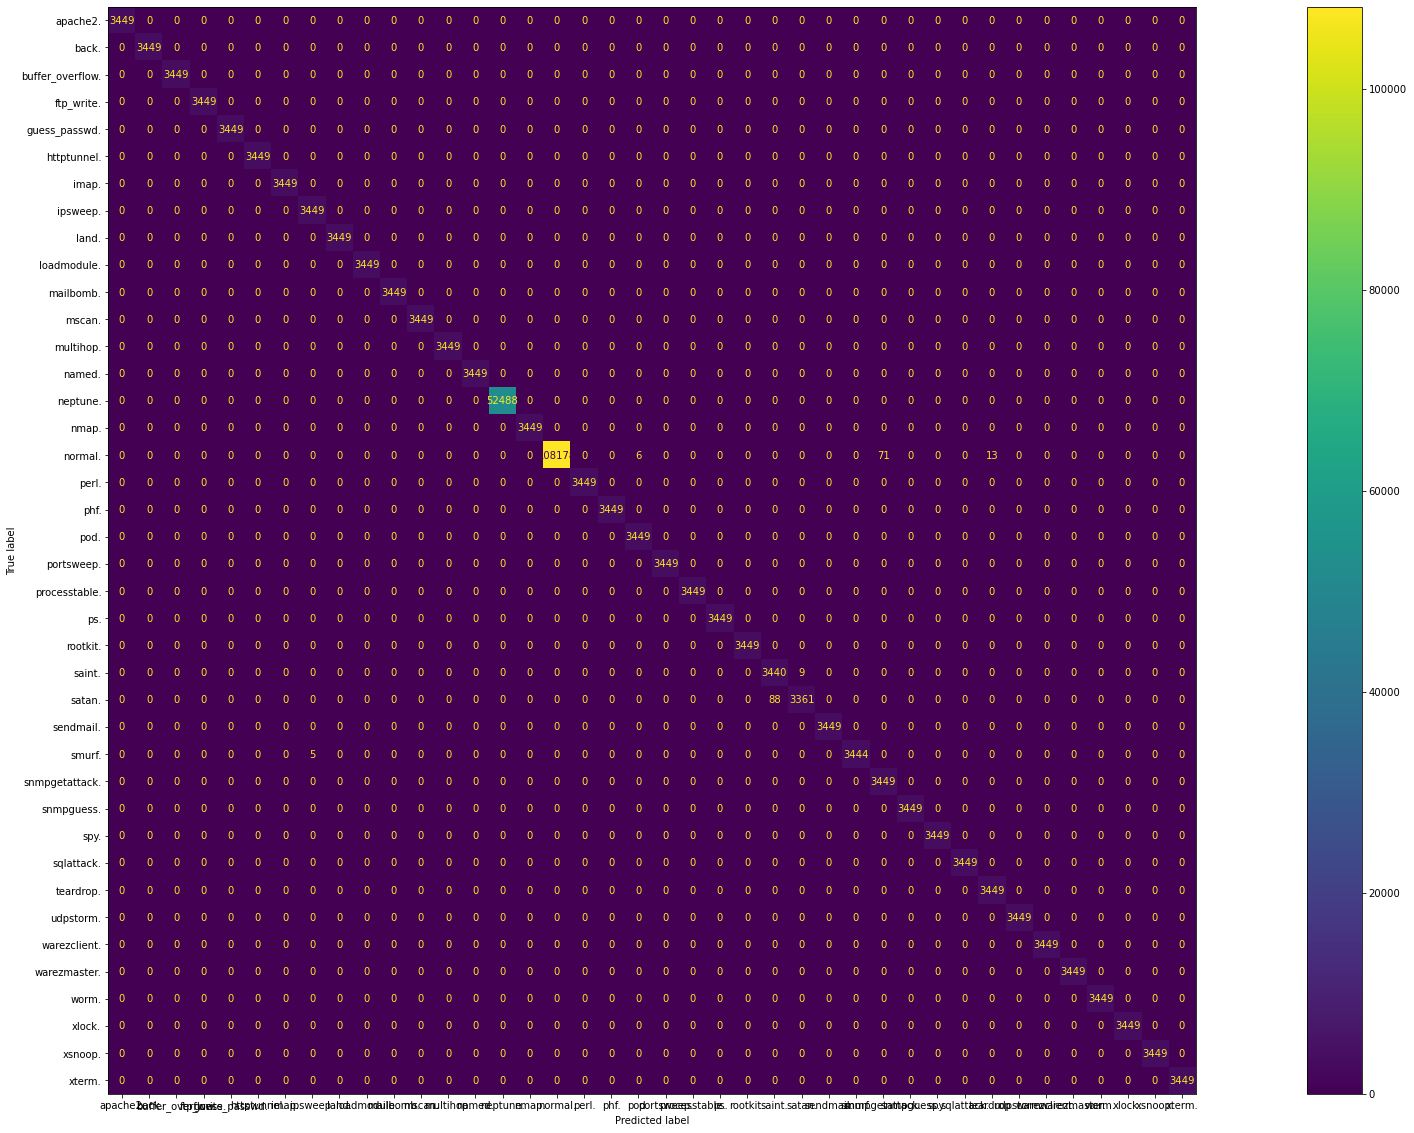

----------------------------------------
Classification report on test data.
                  precision    recall  f1-score   support

        apache2.       0.99      0.99      0.99       159
           back.       1.00      1.00      1.00       267
buffer_overflow.       0.54      0.70      0.61        10
      ftp_write.       0.33      0.50      0.40         2
   guess_passwd.       0.97      1.00      0.98       271
     httptunnel.       1.00      0.93      0.96        29
           imap.       0.60      1.00      0.75         3
        ipsweep.       0.98      0.99      0.98       150
           land.       1.00      1.00      1.00         5
     loadmodule.       0.00      0.00      0.00         2
       mailbomb.       1.00      1.00      1.00        62
          mscan.       0.98      0.98      0.98       210
       multihop.       0.14      0.20      0.17         5
          named.       0.67      0.67      0.67         3
        neptune.       1.00      1.00      1.00     

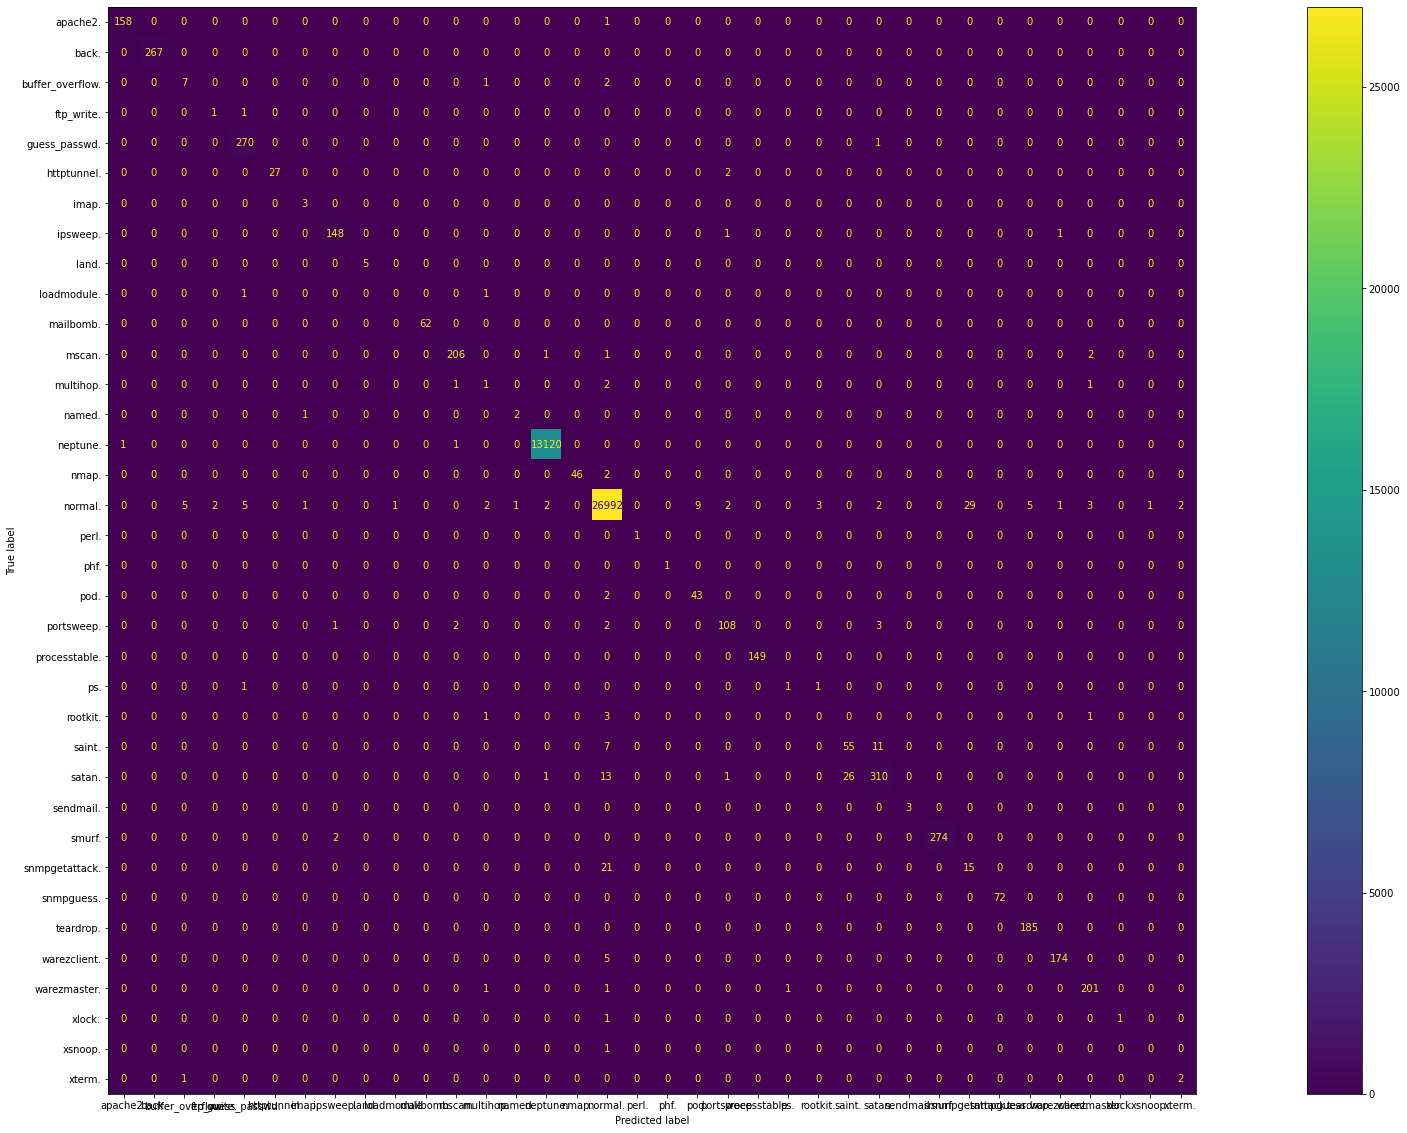

----------------------------------------
----------------------------------------
TPR on train data:  0.9991687294491447
FPR on train data:  0.0
----------------------------------------
----------------------------------------
TPR on test data:  0.9971922565390867
FPR on test data:  0.0039867937457173114
----------------------------------------
{'fit_time': array([3.27492595, 3.13428402, 3.39991069, 3.49368048, 3.43117881]),
 'score_time': array([0.99427772, 0.9040916 , 0.93672037, 0.95472932, 0.90644598]),
 'test_accuracy': array([0.99821808, 0.99842369, 0.99820095, 0.99845793, 0.99857787]),
 'test_f1': array([0.99822281, 0.99842547, 0.9982058 , 0.99846485, 0.99858168]),
 'test_fpr': array([2.72405339e-04, 1.36202670e-04, 5.44810678e-05, 2.72405339e-05,
       2.72405339e-05]),
 'test_precision': array([0.99824305, 0.99844794, 0.99822713, 0.99848905, 0.99859873]),
 'test_recall': array([0.99821808, 0.99842369, 0.99820095, 0.99845793, 0.99857787]),
 'test_tpr': array([0.99695206, 0.996

In [65]:
best_dt,dt_best_params,hypertune_dt_evaluation = hypertune_model(dt,param_grid_dt,X_train,X_test,y_train,y_test)

#### Adding hypertuned decision tree to model performance dataframe

In [66]:
models_performance = models_performance.append(hypertune_dt_evaluation,ignore_index=True)

In [67]:
models_performance

,model,train_accuracy,train_precision,train_recall,train_f1,train_fpr,train_tpr,test_accuracy,test_precision,test_recall,test_f1,test_fpr,test_tpr,test_cv_accuracy,test_cv_precision,test_cv_recall,test_cv_f1,test_cv_fpr,test_cv_tpr
0,DecisionTreeClassifier,0.999342,0.999353,0.999342,0.999343,0.0,0.999169,0.995107,0.995355,0.995107,0.995193,0.003987,0.997192,0.998376,0.998401,0.998376,0.99838,0.000104,0.996934
1,DecisionTreeClassifier_hypertuned,0.999342,0.999353,0.999342,0.999343,0.0,0.999169,0.995107,0.995355,0.995107,0.995193,0.003987,0.997192,0.998376,0.998401,0.998376,0.99838,0.000104,0.996934


#### Observations for hypertuned decision tree model
* Hypertuned decision tree trained model has the same performance as .

#### Training on Naive Bayes

In [68]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB()

#### Evaluating Naive Bayes model

----------------------------------------
Classification report on train data.
                  precision    recall  f1-score   support

        apache2.       0.55      1.00      0.71      3449
           back.       0.18      1.00      0.30      3449
buffer_overflow.       0.65      0.22      0.33      3449
      ftp_write.       0.24      0.66      0.35      3449
   guess_passwd.       0.98      0.19      0.32      3449
     httptunnel.       1.00      0.99      0.99      3449
           imap.       1.00      1.00      1.00      3449
        ipsweep.       0.44      0.97      0.60      3449
           land.       1.00      1.00      1.00      3449
     loadmodule.       0.41      0.66      0.50      3449
       mailbomb.       0.84      1.00      0.91      3449
          mscan.       0.19      0.98      0.32      3449
       multihop.       0.19      0.16      0.18      3449
          named.       0.41      0.79      0.54      3449
        neptune.       1.00      0.99      1.00    

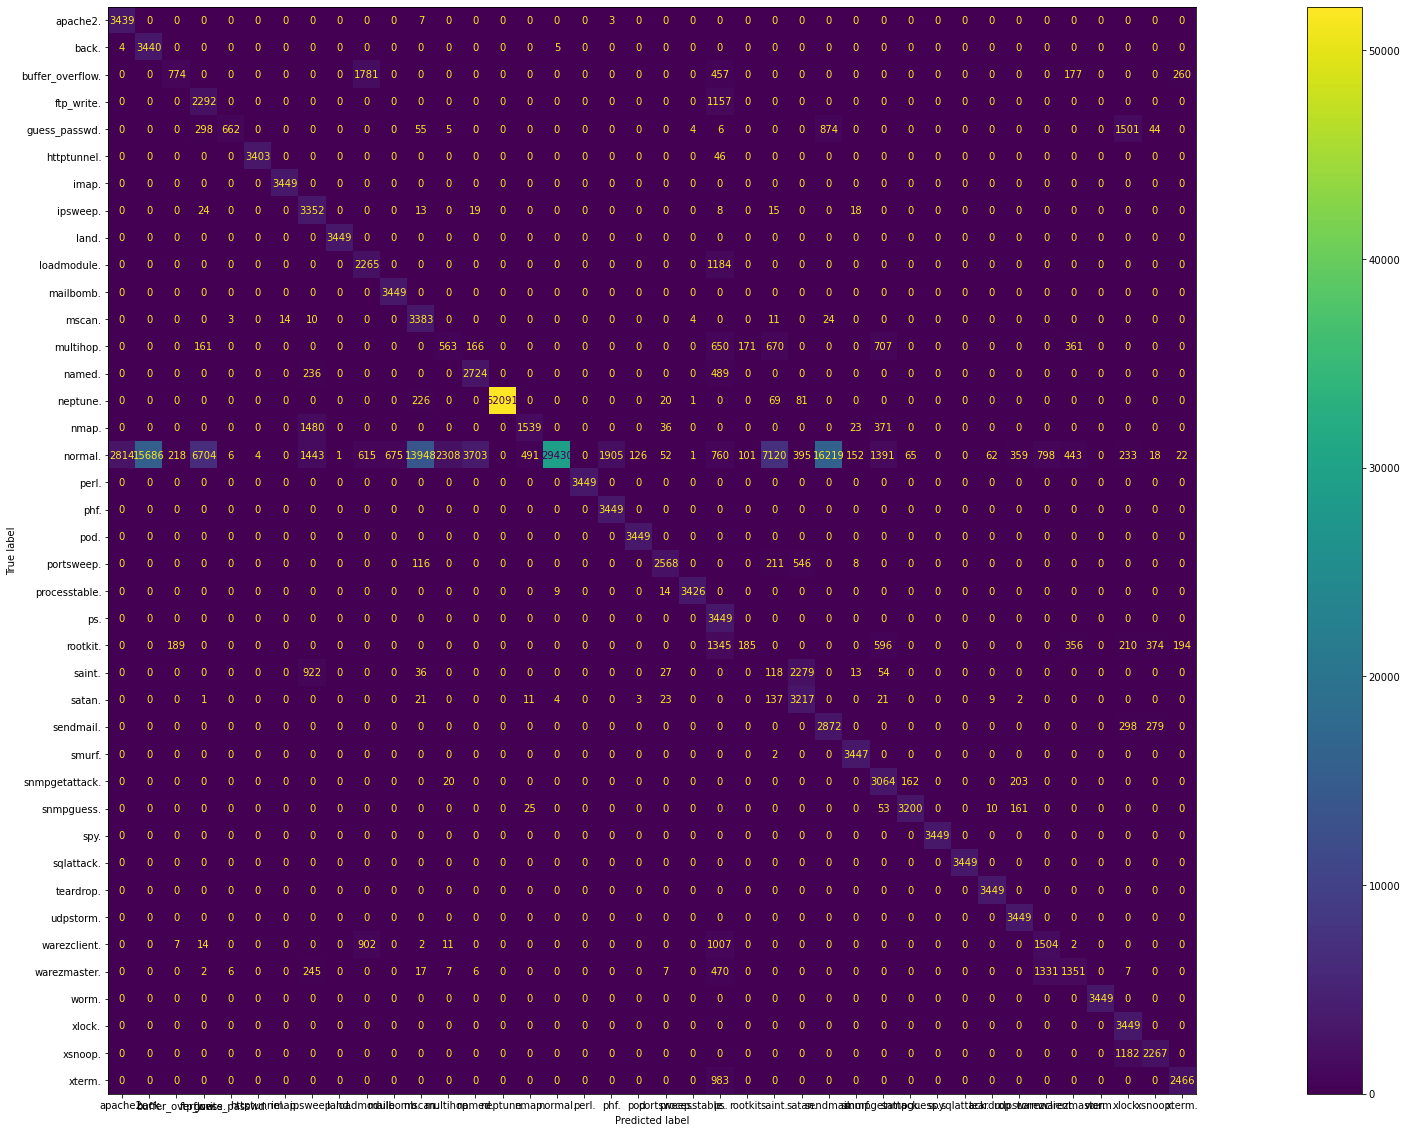

----------------------------------------
Classification report on test data.


C:\Users\msgam\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\msgam\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\msgam\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                  precision    recall  f1-score   support

        apache2.       0.19      1.00      0.32       159
           back.       0.06      1.00      0.12       267
buffer_overflow.       0.03      0.20      0.06        10
      ftp_write.       0.00      0.50      0.00         2
   guess_passwd.       0.96      0.17      0.29       271
     httptunnel.       0.96      0.93      0.95        29
           imap.       1.00      0.67      0.80         3
        ipsweep.       0.25      0.96      0.40       150
           land.       1.00      1.00      1.00         5
     loadmodule.       0.00      0.50      0.01         2
       mailbomb.       0.25      0.98      0.40        62
          mscan.       0.06      0.99      0.11       210
       multihop.       0.00      0.00      0.00         5
          named.       0.00      0.33      0.00         3
        neptune.       1.00      0.99      1.00     13122
           nmap.       0.15      0.40      0.21        48
         norm

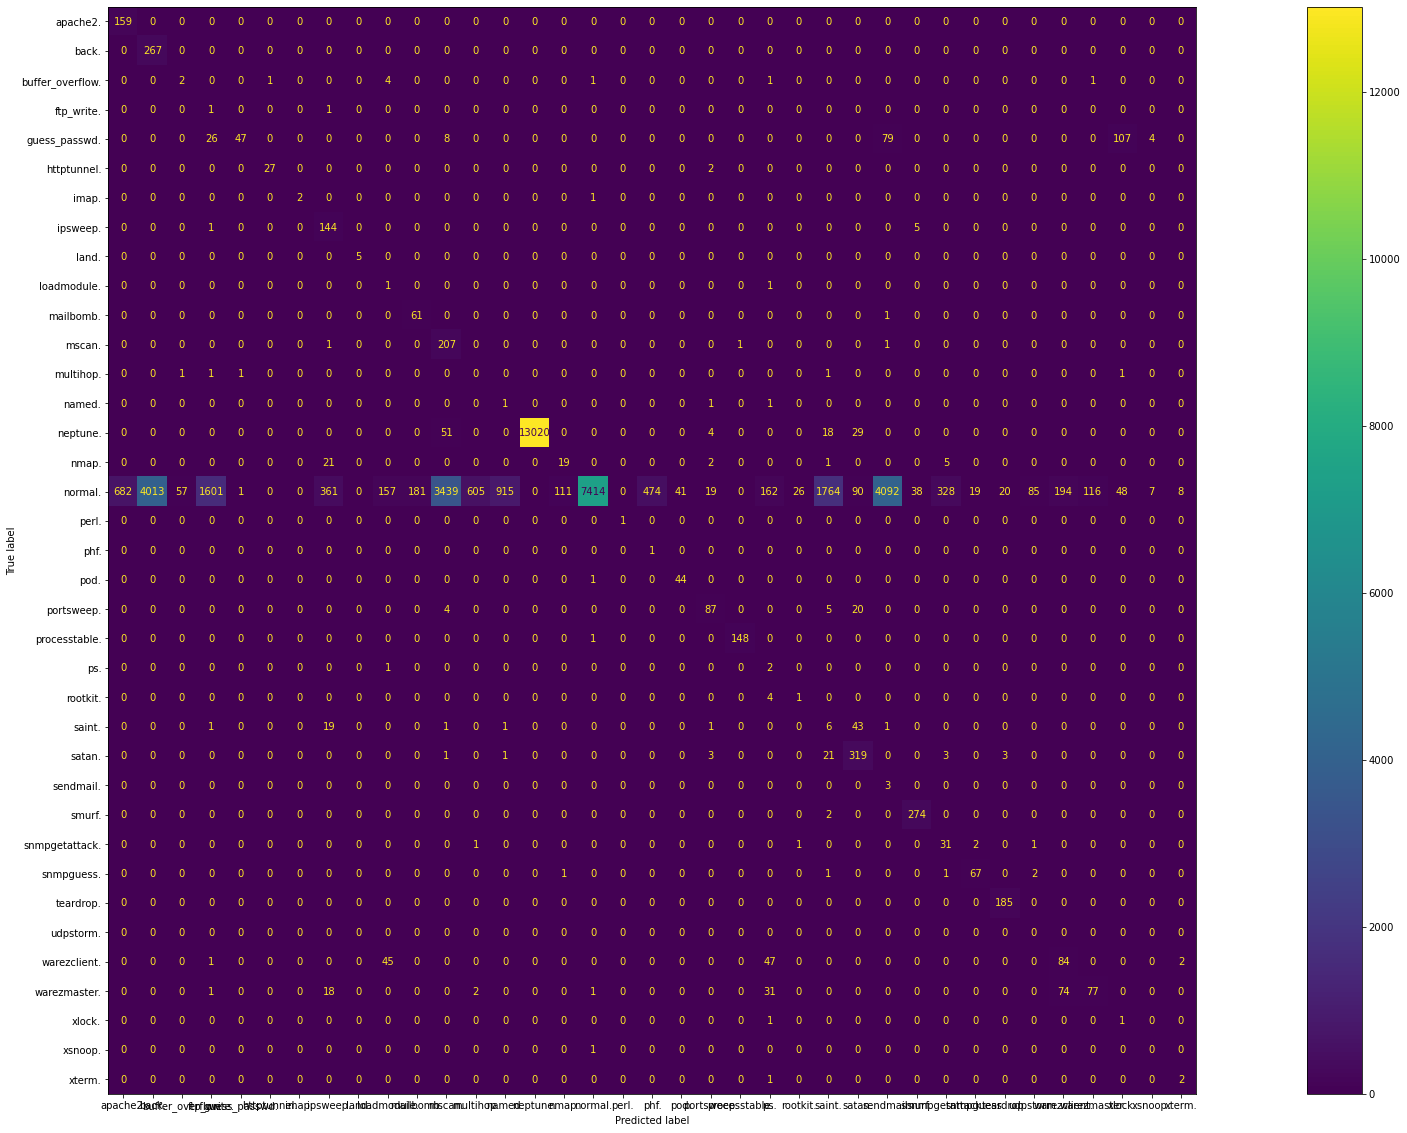

----------------------------------------
----------------------------------------
TPR on train data:  0.2718254701296782
FPR on train data:  9.8065922092073e-05
----------------------------------------
----------------------------------------
TPR on test data:  0.27390276341066944
FPR on test data:  0.00037376191366099795
----------------------------------------
{'fit_time': array([0.50777984, 0.56272411, 0.56471896, 0.52788782, 0.52472591]),
 'score_time': array([2.69592166, 2.65198255, 2.63198233, 2.63581705, 2.67197847]),
 'test_accuracy': array([0.63539168, 0.62824686, 0.62864094, 0.63067354, 0.63524836]),
 'test_f1': array([0.64174384, 0.63087763, 0.63378571, 0.63483876, 0.64002456]),
 'test_fpr': array([1.63443203e-04, 5.44810678e-05, 1.90683737e-04, 1.63443203e-04,
       1.08962136e-04]),
 'test_precision': array([0.84717134, 0.84251656, 0.84393622, 0.84153172, 0.84609033]),
 'test_recall': array([0.63539168, 0.62824686, 0.62864094, 0.63067354, 0.63524836]),
 'test_tpr': array(

In [69]:
nb_evaluation = modelEvaluation(nb,X_train,X_test,y_train,y_test)

#### Adding naive bayes evaluation to model performance dataframe

In [70]:
models_performance = models_performance.append(nb_evaluation,ignore_index=True)

In [71]:
models_performance

,model,train_accuracy,train_precision,train_recall,train_f1,train_fpr,train_tpr,test_accuracy,test_precision,test_recall,test_f1,test_fpr,test_tpr,test_cv_accuracy,test_cv_precision,test_cv_recall,test_cv_f1,test_cv_fpr,test_cv_tpr
0,DecisionTreeClassifier,0.999342,0.999353,0.999342,0.999343,0.000000,0.999169,0.995107,0.995355,0.995107,0.995193,0.003987,0.997192,0.998376,0.998401,0.998376,0.998380,0.000104,0.996934
1,DecisionTreeClassifier_hypertuned,0.999342,0.999353,0.999342,0.999343,0.000000,0.999169,0.995107,0.995355,0.995107,0.995193,0.003987,0.997192,0.998376,0.998401,0.998376,0.998380,0.000104,0.996934
2,GaussianNB,0.630115,0.844720,0.630115,0.634383,0.000098,0.271825,0.526658,0.965882,0.526658,0.607215,0.000374,0.273903,0.631640,0.844249,0.631640,0.636254,0.000136,0.275816


#### Observations for Naive Bayes  model
* Naive bayeb trained model has is not performing as good as decision tree with cross-validation accuracy of 0.63 and f1 of 0.63 .
* But test FPR is lower than decision tree, but will poor values for precision and recall.


#### Hypertuning naive bayes

In [72]:
import numpy as np
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
# print total model that will be trained for hyperparameters
calculate_hyperparameters_combinations(params_NB)

----------------------------------------
100
----------------------------------------


100

Best params for  GaussianNB :
{'var_smoothing': 0.006579332246575682}
----------------------------------------
----------------------------------------
Classification report on train data.


C:\Users\msgam\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\msgam\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\msgam\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                  precision    recall  f1-score   support

        apache2.       1.00      0.66      0.79      3449
           back.       0.75      0.80      0.77      3449
buffer_overflow.       0.98      0.04      0.07      3449
      ftp_write.       0.63      0.33      0.43      3449
   guess_passwd.       0.76      0.40      0.52      3449
     httptunnel.       0.00      0.00      0.00      3449
           imap.       1.00      0.70      0.82      3449
        ipsweep.       0.42      0.87      0.56      3449
           land.       0.97      0.89      0.93      3449
     loadmodule.       0.66      0.55      0.60      3449
       mailbomb.       0.42      1.00      0.59      3449
          mscan.       0.99      0.11      0.20      3449
       multihop.       0.71      0.05      0.10      3449
          named.       0.41      0.08      0.13      3449
        neptune.       0.64      1.00      0.78     52488
           nmap.       0.98      0.14      0.25      3449
         norm

C:\Users\msgam\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision score on training data:  0.7376612733665677
----------------------------------------
Confusion matrix on train data


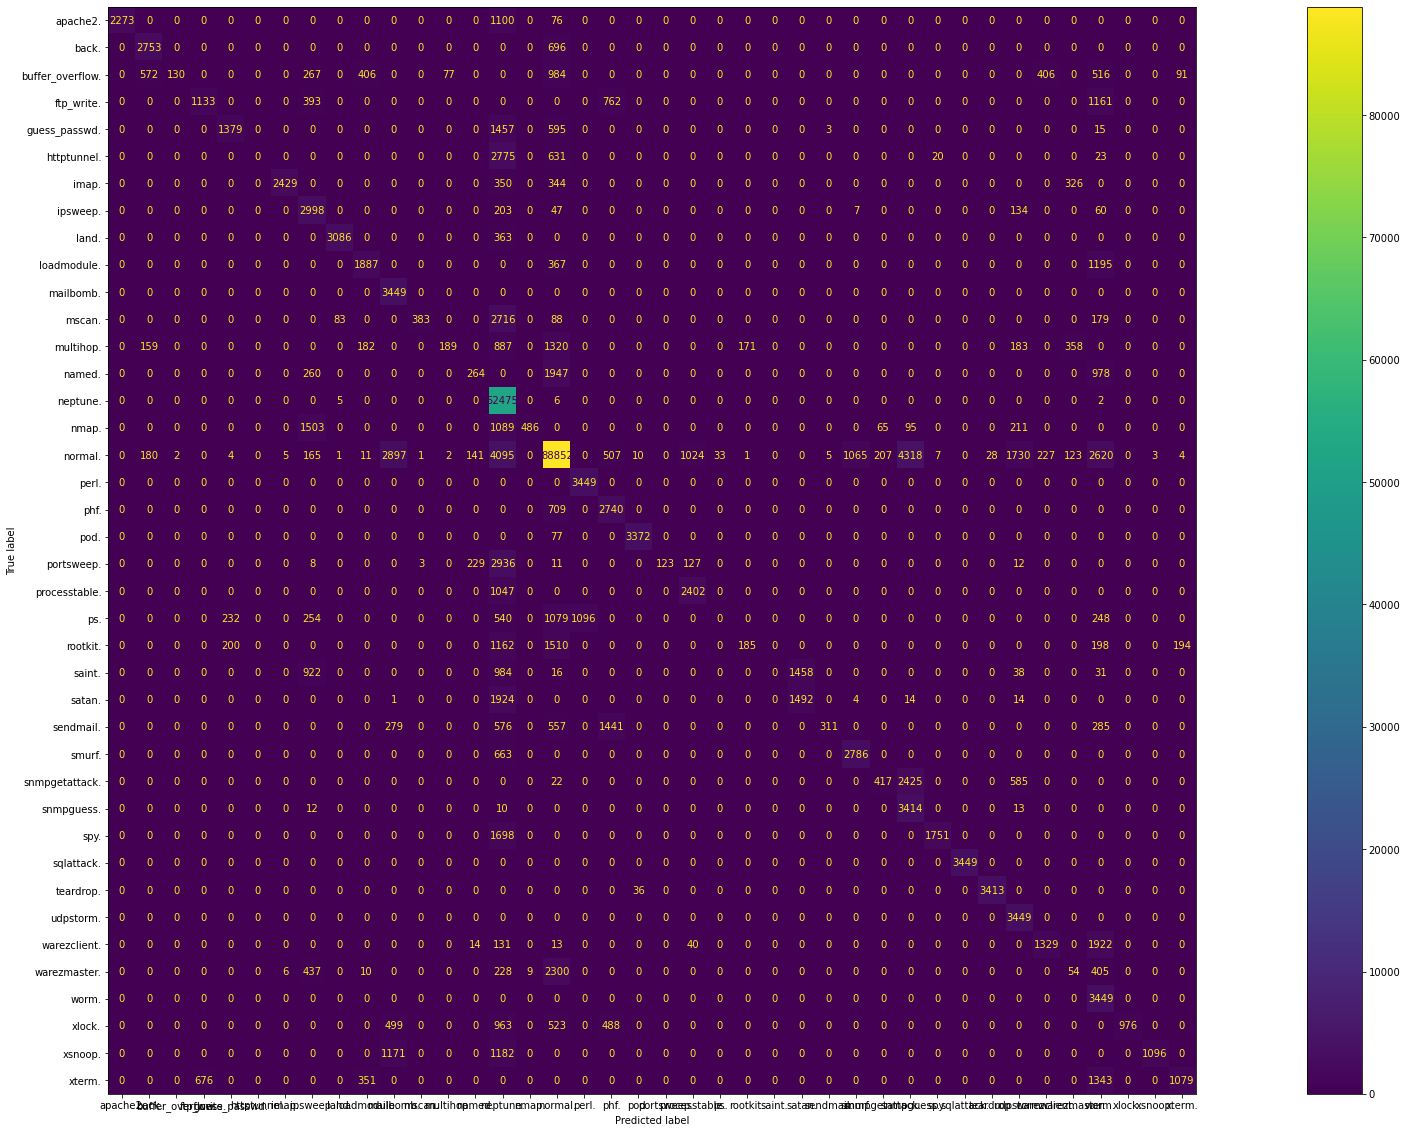

----------------------------------------
Classification report on test data.


C:\Users\msgam\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\msgam\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\msgam\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\msgam\anaconda3\lib\site-packages\sklearn\metrics\_cla

                  precision    recall  f1-score   support

        apache2.       1.00      0.59      0.74       159
           back.       0.80      0.80      0.80       267
buffer_overflow.       0.00      0.00      0.00        10
      ftp_write.       0.00      0.00      0.00         2
   guess_passwd.       0.99      0.39      0.56       271
     httptunnel.       0.00      0.00      0.00        29
           imap.       1.00      0.33      0.50         3
        ipsweep.       0.54      0.89      0.68       150
           land.       0.33      1.00      0.50         5
     loadmodule.       0.00      0.00      0.00         2
       mailbomb.       0.08      1.00      0.14        62
          mscan.       1.00      0.10      0.18       210
       multihop.       0.50      0.20      0.29         5
          named.       0.00      0.00      0.00         3
        neptune.       0.88      1.00      0.93     13122
           nmap.       1.00      0.10      0.19        48
         norm

C:\Users\msgam\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


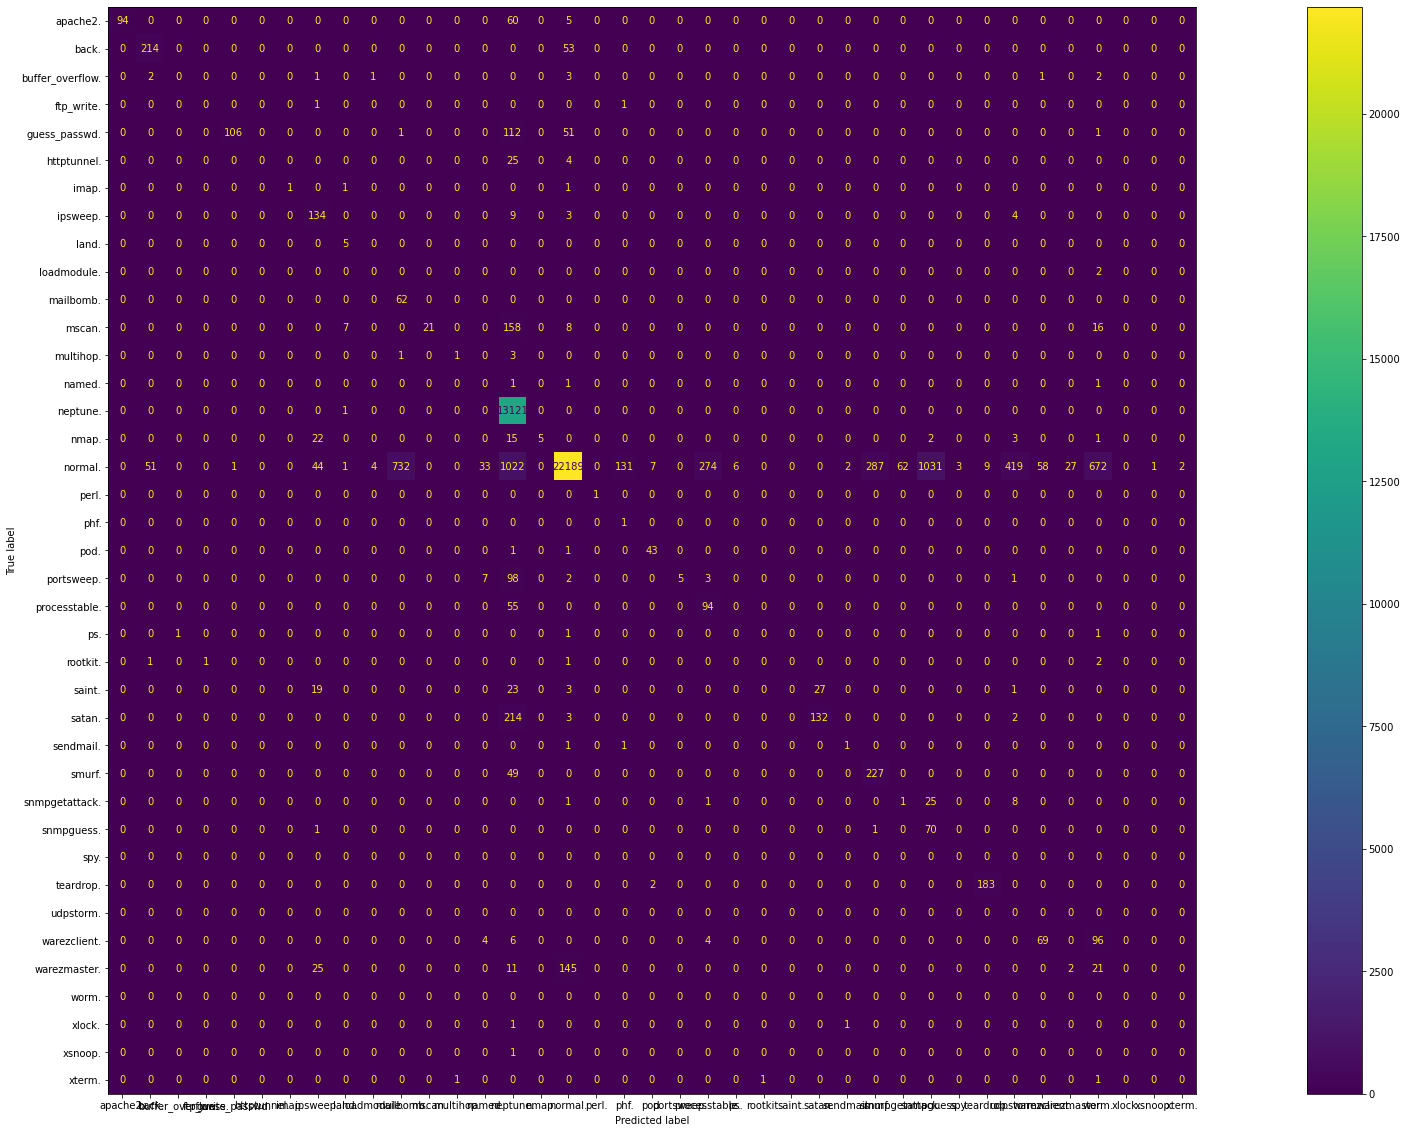

----------------------------------------
----------------------------------------
TPR on train data:  0.8206672331621532
FPR on train data:  0.075826750204304
----------------------------------------
----------------------------------------
TPR on test data:  0.8197502586079504
FPR on test data:  0.01787827820345107
----------------------------------------
{'fit_time': array([0.62577343, 0.47817922, 0.51639366, 0.59451652, 0.57888937]),
 'score_time': array([2.65092349, 2.64224648, 2.6977911 , 2.69781494, 2.65092349]),
 'test_accuracy': array([0.69986636, 0.70325886, 0.69688507, 0.70284255, 0.70889091]),
 'test_f1': array([0.66107197, 0.66402201, 0.66589822, 0.66366045, 0.65951529]),
 'test_fpr': array([0.07807137, 0.07894307, 0.04412966, 0.07692727, 0.13121765]),
 'test_precision': array([0.73662644, 0.73911482, 0.75674942, 0.73929514, 0.71689839]),
 'test_recall': array([0.69986636, 0.70325886, 0.69688507, 0.70284255, 0.70889091]),
 'test_tpr': array([0.81624642, 0.82169576, 0.792971

In [73]:
best_nb,nb_best_params,hypertune_nb_evaluation = hypertune_model(nb,params_NB,X_train,X_test,y_train,y_test)

#### Adding hypertuned naive bayes to model performance dataframe

In [74]:
models_performance = models_performance.append(hypertune_nb_evaluation,ignore_index=True)

In [75]:
models_performance

,model,train_accuracy,train_precision,train_recall,train_f1,train_fpr,train_tpr,test_accuracy,test_precision,test_recall,test_f1,test_fpr,test_tpr,test_cv_accuracy,test_cv_precision,test_cv_recall,test_cv_f1,test_cv_fpr,test_cv_tpr
0,DecisionTreeClassifier,0.999342,0.999353,0.999342,0.999343,0.000000,0.999169,0.995107,0.995355,0.995107,0.995193,0.003987,0.997192,0.998376,0.998401,0.998376,0.998380,0.000104,0.996934
1,DecisionTreeClassifier_hypertuned,0.999342,0.999353,0.999342,0.999343,0.000000,0.999169,0.995107,0.995355,0.995107,0.995193,0.003987,0.997192,0.998376,0.998401,0.998376,0.998380,0.000104,0.996934
2,GaussianNB,0.630115,0.844720,0.630115,0.634383,0.000098,0.271825,0.526658,0.965882,0.526658,0.607215,0.000374,0.273903,0.631640,0.844249,0.631640,0.636254,0.000136,0.275816
3,GaussianNB_hypertuned,0.702157,0.737661,0.702157,0.663385,0.075827,0.820667,0.852995,0.929972,0.852995,0.878019,0.017878,0.819750,0.702349,0.737737,0.702349,0.662834,0.081858,0.820769


#### Observations for hypertuned naive bayes model
* Hypertuning the naive bayes has imporved the performance relative to non-hypertuned naive bayes model.
* But still decision tree is the best performer yet.

#### Training on Random Forest model

In [76]:
from sklearn.ensemble import RandomForestClassifier
randomForest = RandomForestClassifier(class_weight = "balanced",criterion='gini',random_state=42)
randomForest.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

#### Evaluating random forest model

----------------------------------------
Classification report on train data.
                  precision    recall  f1-score   support

        apache2.       1.00      1.00      1.00      3449
           back.       1.00      1.00      1.00      3449
buffer_overflow.       1.00      1.00      1.00      3449
      ftp_write.       1.00      1.00      1.00      3449
   guess_passwd.       1.00      1.00      1.00      3449
     httptunnel.       1.00      1.00      1.00      3449
           imap.       1.00      1.00      1.00      3449
        ipsweep.       1.00      1.00      1.00      3449
           land.       1.00      1.00      1.00      3449
     loadmodule.       1.00      1.00      1.00      3449
       mailbomb.       1.00      1.00      1.00      3449
          mscan.       1.00      1.00      1.00      3449
       multihop.       1.00      1.00      1.00      3449
          named.       1.00      1.00      1.00      3449
        neptune.       1.00      1.00      1.00    

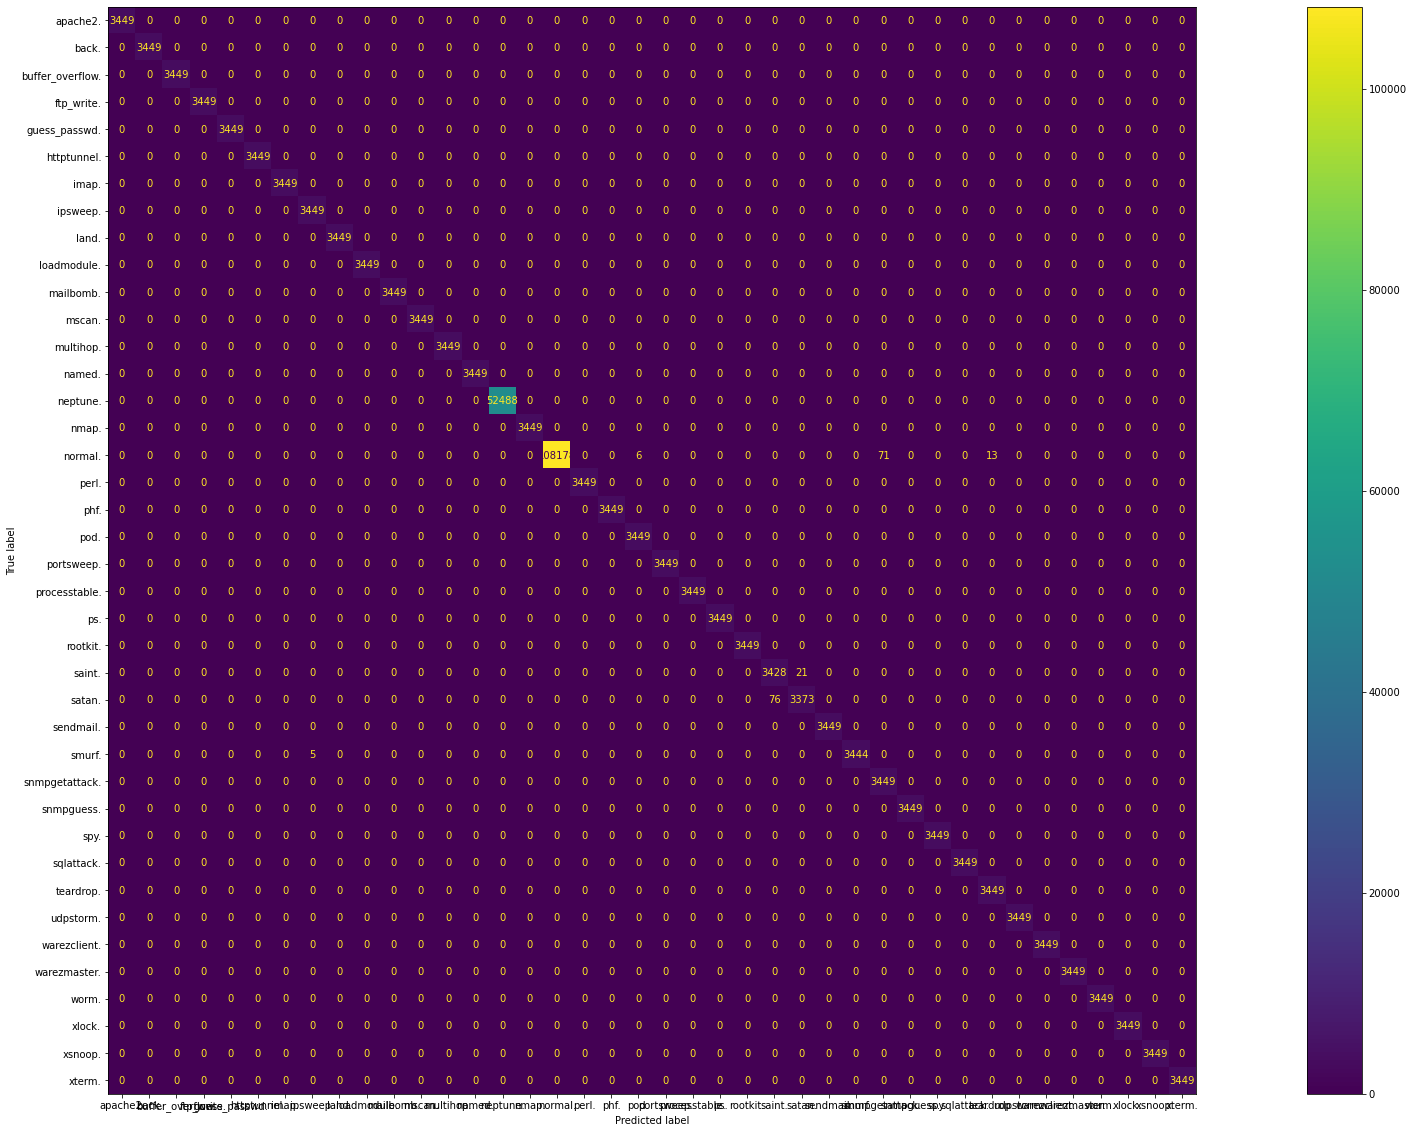

----------------------------------------
Classification report on test data.


C:\Users\msgam\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\msgam\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\msgam\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                  precision    recall  f1-score   support

        apache2.       1.00      0.99      1.00       159
           back.       1.00      1.00      1.00       267
buffer_overflow.       0.75      0.90      0.82        10
      ftp_write.       0.00      0.00      0.00         2
   guess_passwd.       1.00      1.00      1.00       271
     httptunnel.       1.00      0.97      0.98        29
           imap.       1.00      0.33      0.50         3
        ipsweep.       1.00      0.97      0.98       150
           land.       1.00      1.00      1.00         5
     loadmodule.       1.00      0.50      0.67         2
       mailbomb.       1.00      1.00      1.00        62
          mscan.       1.00      1.00      1.00       210
       multihop.       0.12      0.20      0.15         5
          named.       0.00      0.00      0.00         3
        neptune.       1.00      1.00      1.00     13122
           nmap.       1.00      0.96      0.98        48
         norm

C:\Users\msgam\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


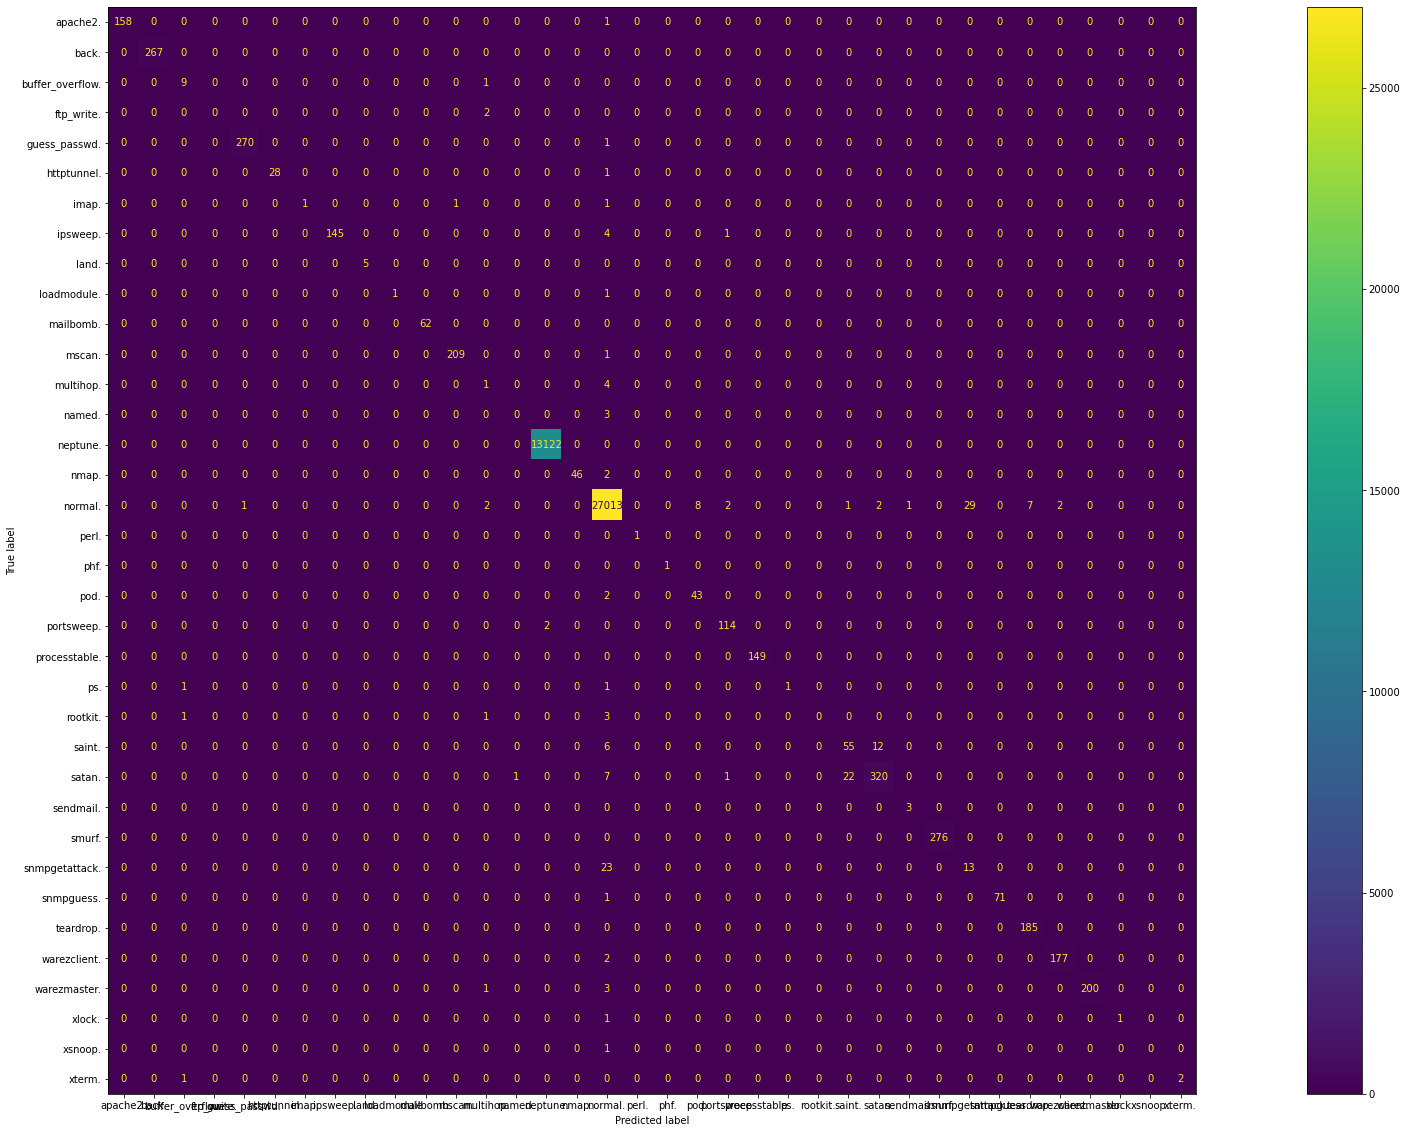

----------------------------------------
----------------------------------------
TPR on train data:  0.9991687294491447
FPR on train data:  0.0
----------------------------------------
----------------------------------------
TPR on test data:  0.9979680803901285
FPR on test data:  0.004298262007101476
----------------------------------------
{'fit_time': array([29.6615479 , 31.27559114, 30.88341618, 31.48614192, 29.96382117]),
 'score_time': array([2.83575654, 3.52044344, 3.34495807, 3.39764667, 3.11525917]),
 'test_accuracy': array([0.99857789, 0.99880063, 0.9987835 , 0.9986464 , 0.99890341]),
 'test_f1': array([0.99858333, 0.99880383, 0.99878794, 0.99865347, 0.9989078 ]),
 'test_fpr': array([1.90683737e-04, 2.72405339e-05, 2.72405339e-05, 2.72405339e-05,
       2.72405339e-05]),
 'test_precision': array([0.99860626, 0.99882382, 0.99880596, 0.99867766, 0.99892531]),
 'test_recall': array([0.99857789, 0.99880063, 0.9987835 , 0.9986464 , 0.99890341]),
 'test_tpr': array([0.9975986 , 0

In [77]:
random_forest_evaluation = modelEvaluation(randomForest,X_train,X_test,y_train,y_test)

#### Adding random forest model evaluation model performance dataframe

In [78]:
models_performance = models_performance.append(random_forest_evaluation,ignore_index=True)
models_performance

,model,train_accuracy,train_precision,train_recall,train_f1,train_fpr,train_tpr,test_accuracy,test_precision,test_recall,test_f1,test_fpr,test_tpr,test_cv_accuracy,test_cv_precision,test_cv_recall,test_cv_f1,test_cv_fpr,test_cv_tpr
0,DecisionTreeClassifier,0.999342,0.999353,0.999342,0.999343,0.000000,0.999169,0.995107,0.995355,0.995107,0.995193,0.003987,0.997192,0.998376,0.998401,0.998376,0.998380,0.000104,0.996934
1,DecisionTreeClassifier_hypertuned,0.999342,0.999353,0.999342,0.999343,0.000000,0.999169,0.995107,0.995355,0.995107,0.995193,0.003987,0.997192,0.998376,0.998401,0.998376,0.998380,0.000104,0.996934
2,GaussianNB,0.630115,0.844720,0.630115,0.634383,0.000098,0.271825,0.526658,0.965882,0.526658,0.607215,0.000374,0.273903,0.631640,0.844249,0.631640,0.636254,0.000136,0.275816
3,GaussianNB_hypertuned,0.702157,0.737661,0.702157,0.663385,0.075827,0.820667,0.852995,0.929972,0.852995,0.878019,0.017878,0.819750,0.702349,0.737737,0.702349,0.662834,0.081858,0.820769
4,RandomForestClassifier,0.999342,0.999350,0.999342,0.999343,0.000000,0.999169,0.996011,0.996001,0.996011,0.995954,0.004298,0.997968,0.998742,0.998768,0.998742,0.998747,0.000060,0.997783


#### Observations for random forest model
* Random forest trained model has high test accuracy, with precision and recall score on train data.
* Cross validation is used to evaluate the model generalization performance.
* Based on cross validation model shows similar performance compared to train result.
* FPR on cross validation is good `0.000060`, as our goal is to minimize the FPR and balance between precision and recall.
* Even on test set the model has low FPR and high precision and recall value.
* Random forest trained model is performing better than decision tree.

#### Hypertuning random forest

In [79]:
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 100, num = 5)]
# Method of selecting samples for training each tree
bootstrap = [False]
# Class weight for the response variable
class_weight = ["balanced"]
# Impurity measure
criterion = ['gini','entropy']
# Create the params grid
params_random_forest = {'max_features': max_features,
                        'max_depth': max_depth,
                        'bootstrap': bootstrap,
                        'class_weight': class_weight,
                        'criterion': criterion}
# print total model that will be trained for hyperparameters
calculate_hyperparameters_combinations(params_random_forest)

----------------------------------------
20
----------------------------------------


20

Best params for  RandomForestClassifier :
{'bootstrap': False, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 32, 'max_features': 'auto'}
----------------------------------------
----------------------------------------
Classification report on train data.
                  precision    recall  f1-score   support

        apache2.       1.00      1.00      1.00      3449
           back.       1.00      1.00      1.00      3449
buffer_overflow.       1.00      1.00      1.00      3449
      ftp_write.       1.00      1.00      1.00      3449
   guess_passwd.       1.00      1.00      1.00      3449
     httptunnel.       1.00      1.00      1.00      3449
           imap.       1.00      1.00      1.00      3449
        ipsweep.       1.00      1.00      1.00      3449
           land.       1.00      1.00      1.00      3449
     loadmodule.       1.00      1.00      1.00      3449
       mailbomb.       1.00      1.00      1.00      3449
          mscan.       1.00    

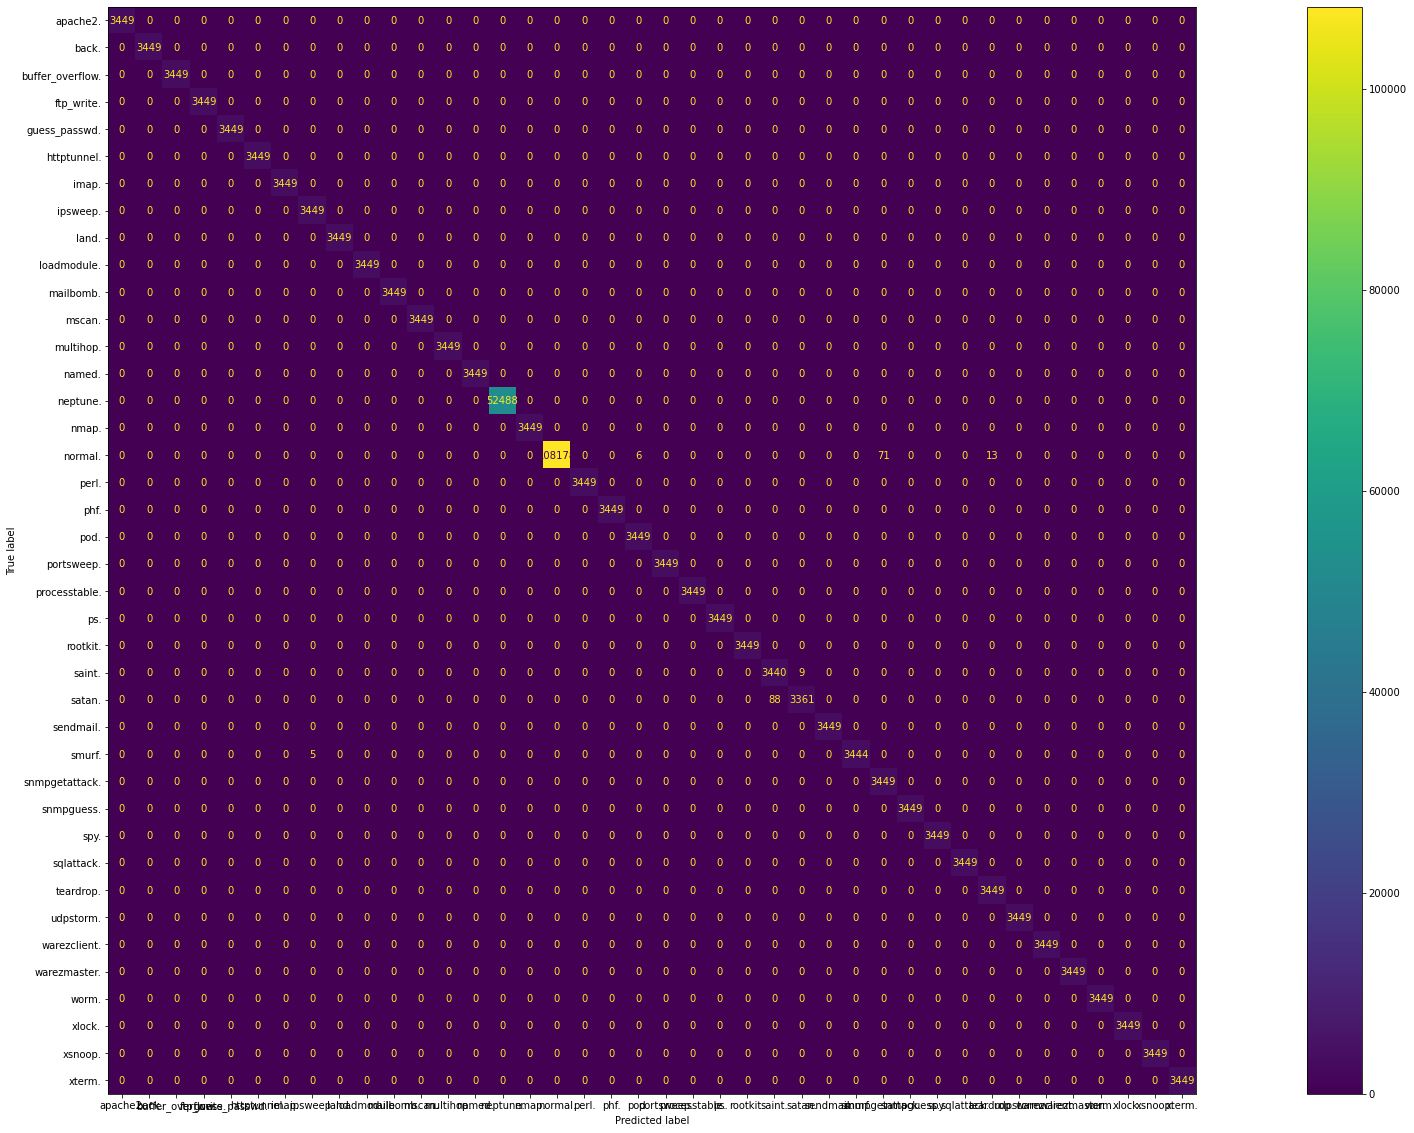

----------------------------------------
Classification report on test data.


C:\Users\msgam\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\msgam\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\msgam\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                  precision    recall  f1-score   support

        apache2.       1.00      0.99      1.00       159
           back.       1.00      1.00      1.00       267
buffer_overflow.       0.75      0.90      0.82        10
      ftp_write.       0.00      0.00      0.00         2
   guess_passwd.       1.00      1.00      1.00       271
     httptunnel.       1.00      0.97      0.98        29
           imap.       1.00      0.33      0.50         3
        ipsweep.       1.00      0.97      0.98       150
           land.       1.00      1.00      1.00         5
     loadmodule.       1.00      0.50      0.67         2
       mailbomb.       1.00      1.00      1.00        62
          mscan.       1.00      1.00      1.00       210
       multihop.       0.17      0.20      0.18         5
          named.       0.00      0.00      0.00         3
        neptune.       1.00      1.00      1.00     13122
           nmap.       1.00      0.96      0.98        48
         norm

C:\Users\msgam\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


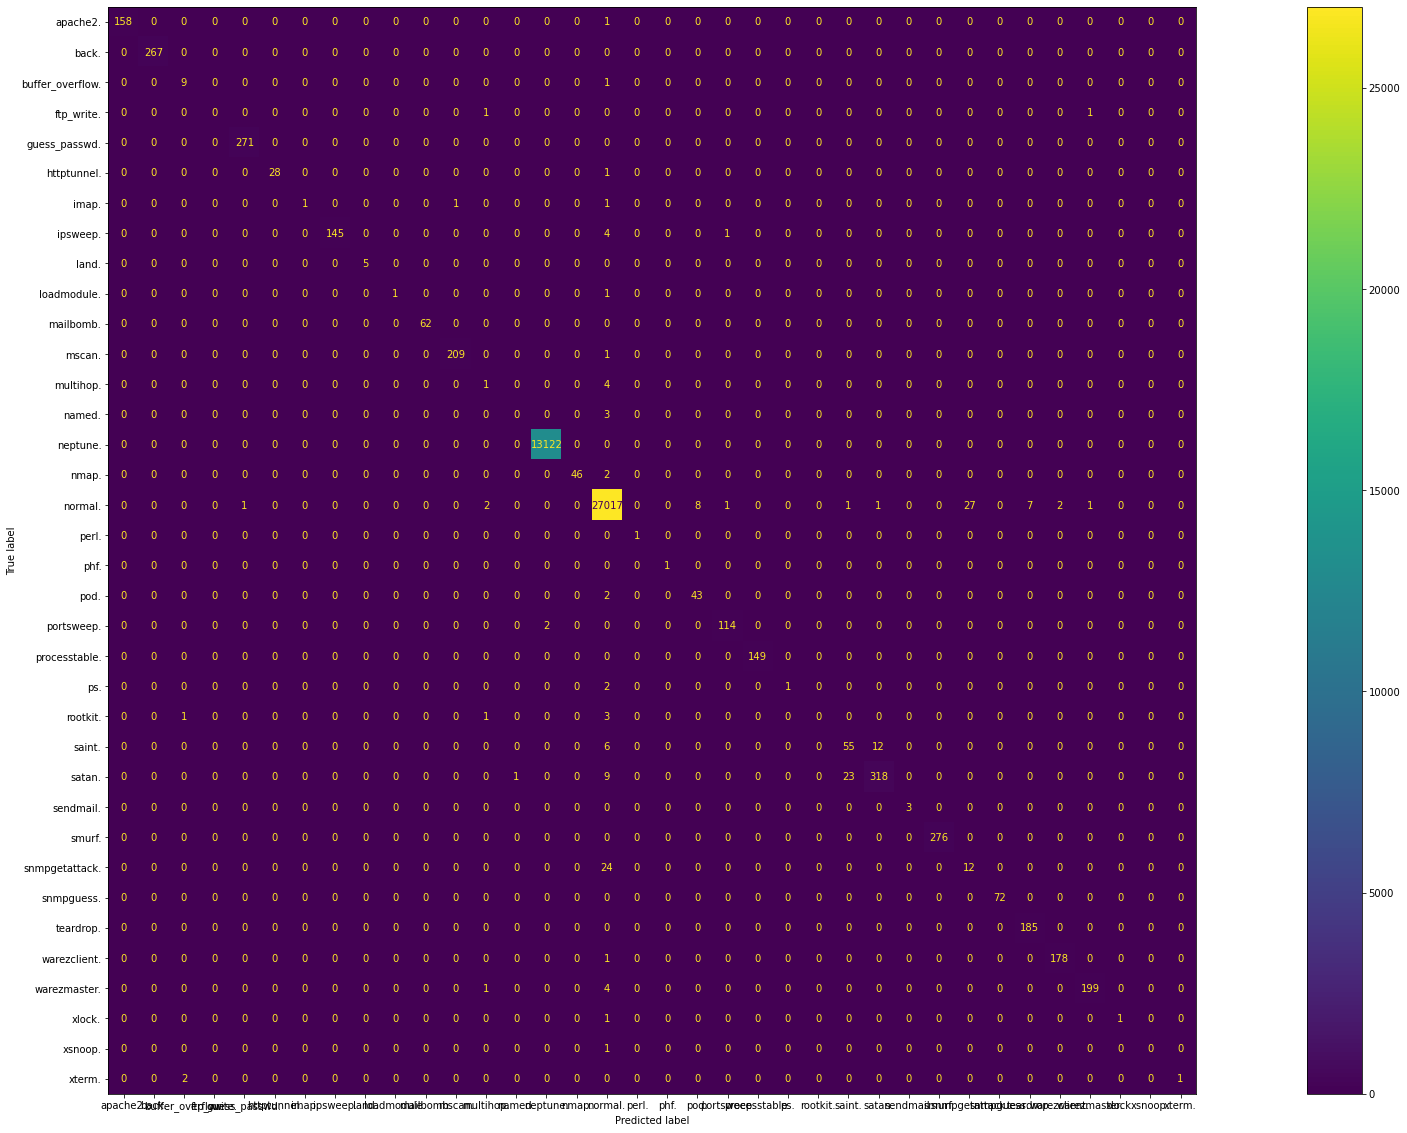

----------------------------------------
----------------------------------------
TPR on train data:  0.9991687294491447
FPR on train data:  0.0
----------------------------------------
----------------------------------------
TPR on test data:  0.9981158563617556
FPR on test data:  0.004485142963931975
----------------------------------------
{'fit_time': array([46.92564034, 47.61445999, 46.06612563, 47.64718437, 48.6145649 ]),
 'score_time': array([3.31941557, 3.59132695, 2.663342  , 3.49535704, 3.49357915]),
 'test_accuracy': array([0.99871496, 0.9988349 , 0.99892057, 0.99878348, 0.99900622]),
 'test_f1': array([0.99871944, 0.9988376 , 0.99892425, 0.99878974, 0.99900927]),
 'test_fpr': array([1.90683737e-04, 8.17216017e-05, 2.72405339e-05, 2.72405339e-05,
       2.72405339e-05]),
 'test_precision': array([0.9987446 , 0.99885682, 0.9989405 , 0.99881138, 0.99902267]),
 'test_recall': array([0.99871496, 0.9988349 , 0.99892057, 0.99878348, 0.99900622]),
 'test_tpr': array([0.99792186, 0

In [80]:
best_random_forest,random_forest_best_params,hypertune_random_forest_evaluation = hypertune_model(randomForest,params_random_forest,X_train,X_test,y_train,y_test)

#### Adding hypertuned random forest to model performance dataframe

In [81]:
models_performance = models_performance.append(hypertune_random_forest_evaluation,ignore_index=True)

In [82]:
models_performance

,model,train_accuracy,train_precision,train_recall,train_f1,train_fpr,train_tpr,test_accuracy,test_precision,test_recall,test_f1,test_fpr,test_tpr,test_cv_accuracy,test_cv_precision,test_cv_recall,test_cv_f1,test_cv_fpr,test_cv_tpr
0,DecisionTreeClassifier,0.999342,0.999353,0.999342,0.999343,0.000000,0.999169,0.995107,0.995355,0.995107,0.995193,0.003987,0.997192,0.998376,0.998401,0.998376,0.998380,0.000104,0.996934
1,DecisionTreeClassifier_hypertuned,0.999342,0.999353,0.999342,0.999343,0.000000,0.999169,0.995107,0.995355,0.995107,0.995193,0.003987,0.997192,0.998376,0.998401,0.998376,0.998380,0.000104,0.996934
2,GaussianNB,0.630115,0.844720,0.630115,0.634383,0.000098,0.271825,0.526658,0.965882,0.526658,0.607215,0.000374,0.273903,0.631640,0.844249,0.631640,0.636254,0.000136,0.275816
3,GaussianNB_hypertuned,0.702157,0.737661,0.702157,0.663385,0.075827,0.820667,0.852995,0.929972,0.852995,0.878019,0.017878,0.819750,0.702349,0.737737,0.702349,0.662834,0.081858,0.820769
4,RandomForestClassifier,0.999342,0.999350,0.999342,0.999343,0.000000,0.999169,0.996011,0.996001,0.996011,0.995954,0.004298,0.997968,0.998742,0.998768,0.998742,0.998747,0.000060,0.997783
5,RandomForestClassifier_hypertuned,0.999342,0.999353,0.999342,0.999343,0.000000,0.999169,0.996058,0.995958,0.996058,0.995947,0.004485,0.998116,0.998852,0.998875,0.998852,0.998856,0.000071,0.998051


#### Observations for hypertuned random forest model
* Hypertuned random forest trained model has high test accuracy, with precision and recall score on train data.
* Hypertuning has improved random forest performance.
* Train set results are not considered for model evaluation.
* Cross validation is used to evaluate the model generalization performance.
* Based on cross validation model shows similar performance compared to train result.
* FPR on cross validation is good `0.000071`, as our goal is to minimize the FPR and balance between precision and recall.
* Even on test set the model has low FPR and high precision and recall value.
* So far hypertuned random forest is the best performer with on test set as well as cross validation.

#### Training on Logistic regression

In [83]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=42,class_weight='balanced',multi_class='multinomial',n_jobs=-1,solver='saga')
lr.fit(X_train,y_train)

C:\Users\msgam\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(class_weight='balanced', multi_class='multinomial',
                   n_jobs=-1, random_state=42, solver='saga')

#### Evaluating logistic regression model

----------------------------------------
Classification report on train data.
                  precision    recall  f1-score   support

        apache2.       0.97      1.00      0.98      3449
           back.       0.96      0.99      0.98      3449
buffer_overflow.       0.80      0.77      0.78      3449
      ftp_write.       0.97      0.55      0.70      3449
   guess_passwd.       0.90      0.90      0.90      3449
     httptunnel.       0.81      0.98      0.89      3449
           imap.       0.96      0.80      0.87      3449
        ipsweep.       0.56      0.93      0.70      3449
           land.       0.93      1.00      0.97      3449
     loadmodule.       0.72      0.55      0.62      3449
       mailbomb.       0.39      1.00      0.56      3449
          mscan.       0.70      0.90      0.79      3449
       multihop.       0.39      0.61      0.47      3449
          named.       0.62      1.00      0.77      3449
        neptune.       1.00      0.98      0.99    

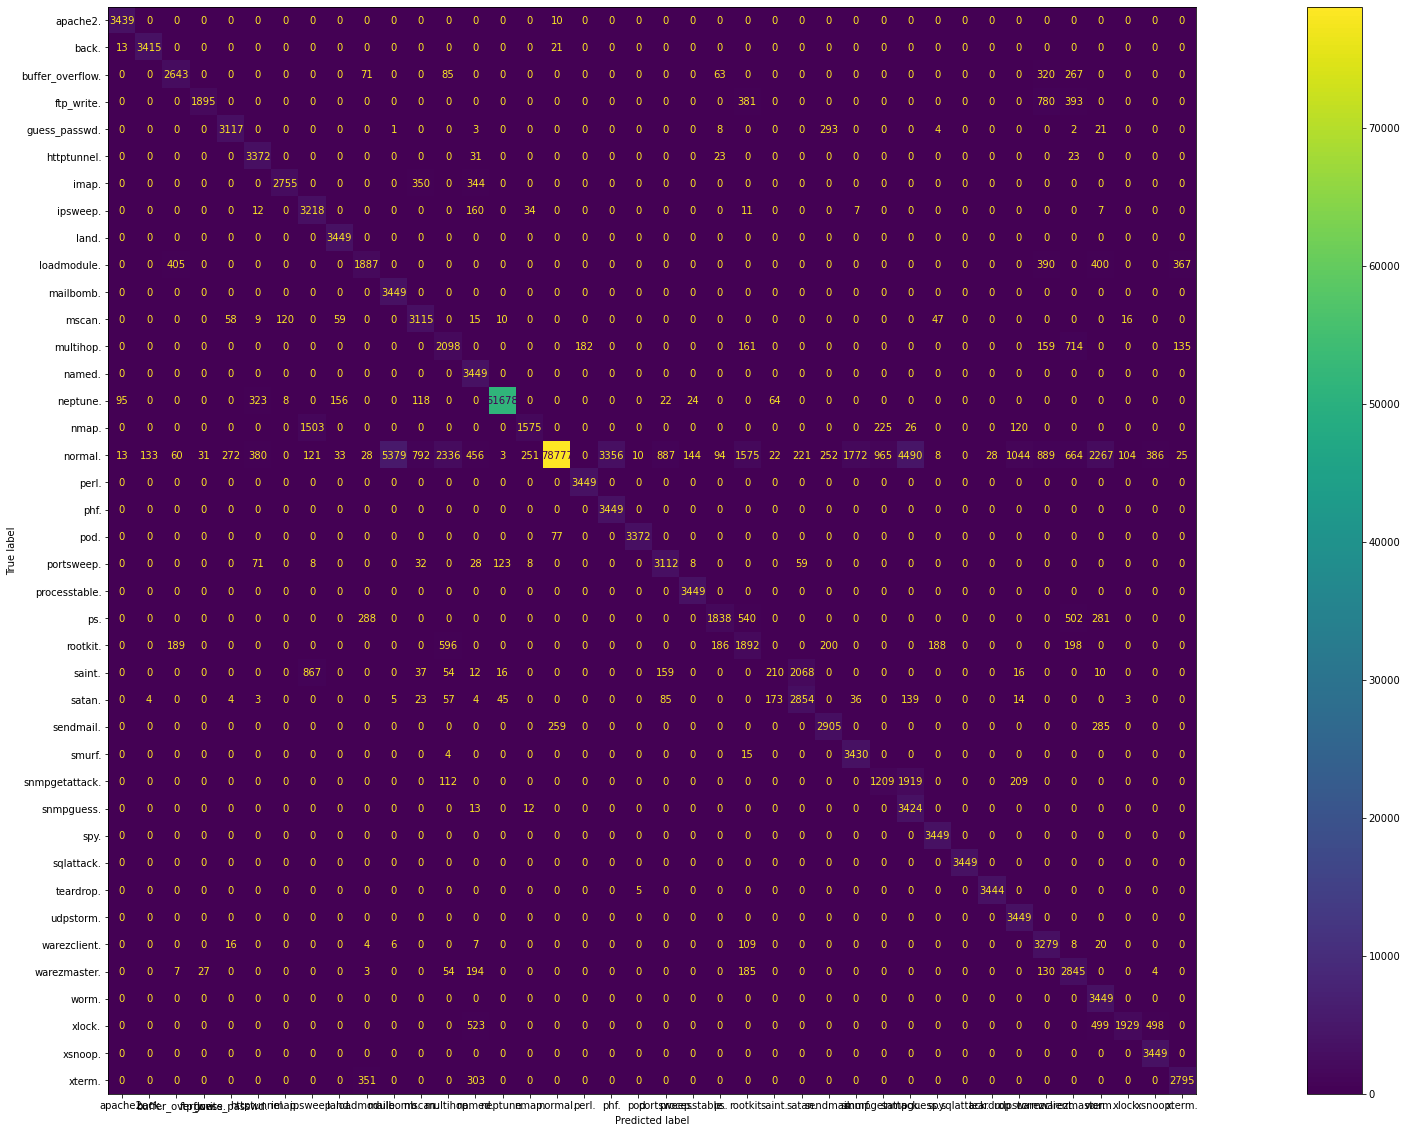

----------------------------------------
Classification report on test data.


C:\Users\msgam\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\msgam\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\msgam\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                  precision    recall  f1-score   support

        apache2.       0.88      0.99      0.93       159
           back.       0.87      0.99      0.93       267
buffer_overflow.       0.24      0.60      0.34        10
      ftp_write.       0.07      0.50      0.12         2
   guess_passwd.       0.78      0.89      0.83       271
     httptunnel.       0.12      0.97      0.22        29
           imap.       0.22      0.67      0.33         3
        ipsweep.       0.69      0.95      0.80       150
           land.       0.10      1.00      0.18         5
     loadmodule.       0.00      0.00      0.00         2
       mailbomb.       0.04      1.00      0.09        62
          mscan.       0.47      0.88      0.61       210
       multihop.       0.00      0.00      0.00         5
          named.       0.01      0.67      0.02         3
        neptune.       1.00      0.98      0.99     13122
           nmap.       0.21      0.44      0.29        48
         norm

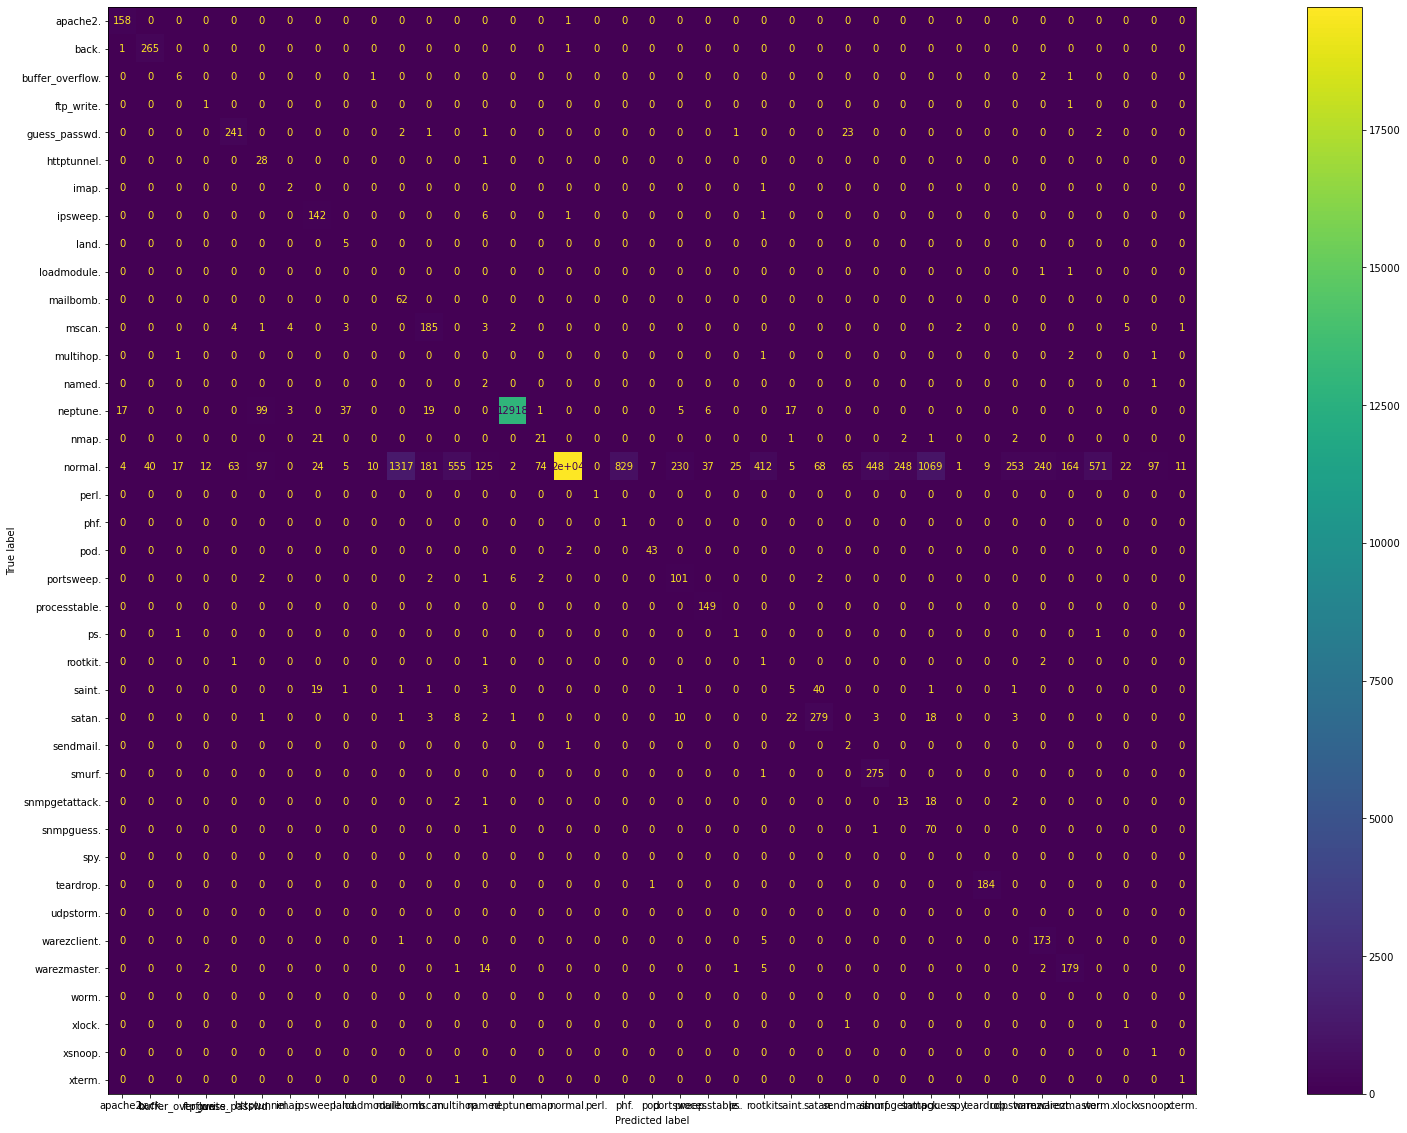

----------------------------------------
----------------------------------------
TPR on train data:  0.727611113163631
FPR on train data:  0.001999455189321711
----------------------------------------
----------------------------------------
TPR on test data:  0.7289419240431506
FPR on test data:  0.00037376191366099795
----------------------------------------
{'fit_time': array([187.16685152, 187.69167709, 188.44493866, 187.35974765,
       187.56667542]),
 'score_time': array([1.0905838 , 1.17513585, 1.12501621, 1.1008122 , 1.09700632]),
 'test_accuracy': array([0.80928312, 0.81097937, 0.80998561, 0.81279235, 0.80905711]),
 'test_f1': array([0.81635215, 0.81798506, 0.81645464, 0.81959061, 0.81547594]),
 'test_fpr': array([0.00204304, 0.00198856, 0.0020158 , 0.00198856, 0.00196132]),
 'test_precision': array([0.86726697, 0.86842332, 0.86512588, 0.86921165, 0.86425415]),
 'test_recall': array([0.80928312, 0.81097937, 0.80998561, 0.81279235, 0.80905711]),
 'test_tpr': array([0.72060589

In [84]:
lr_evaluation = modelEvaluation(lr,X_train,X_test,y_train,y_test)

#### Adding logistic regression model  evaluation to  model performance dataframe

In [85]:
models_performance = models_performance.append(lr_evaluation,ignore_index=True)
models_performance

,model,train_accuracy,train_precision,train_recall,train_f1,train_fpr,train_tpr,test_accuracy,test_precision,test_recall,test_f1,test_fpr,test_tpr,test_cv_accuracy,test_cv_precision,test_cv_recall,test_cv_f1,test_cv_fpr,test_cv_tpr
0,DecisionTreeClassifier,0.999342,0.999353,0.999342,0.999343,0.000000,0.999169,0.995107,0.995355,0.995107,0.995193,0.003987,0.997192,0.998376,0.998401,0.998376,0.998380,0.000104,0.996934
1,DecisionTreeClassifier_hypertuned,0.999342,0.999353,0.999342,0.999343,0.000000,0.999169,0.995107,0.995355,0.995107,0.995193,0.003987,0.997192,0.998376,0.998401,0.998376,0.998380,0.000104,0.996934
2,GaussianNB,0.630115,0.844720,0.630115,0.634383,0.000098,0.271825,0.526658,0.965882,0.526658,0.607215,0.000374,0.273903,0.631640,0.844249,0.631640,0.636254,0.000136,0.275816
3,GaussianNB_hypertuned,0.702157,0.737661,0.702157,0.663385,0.075827,0.820667,0.852995,0.929972,0.852995,0.878019,0.017878,0.819750,0.702349,0.737737,0.702349,0.662834,0.081858,0.820769
4,RandomForestClassifier,0.999342,0.999350,0.999342,0.999343,0.000000,0.999169,0.996011,0.996001,0.996011,0.995954,0.004298,0.997968,0.998742,0.998768,0.998742,0.998747,0.000060,0.997783
5,RandomForestClassifier_hypertuned,0.999342,0.999353,0.999342,0.999343,0.000000,0.999169,0.996058,0.995958,0.996058,0.995947,0.004485,0.998116,0.998852,0.998875,0.998852,0.998856,0.000071,0.998051
6,LogisticRegression,0.820583,0.878256,0.820583,0.827580,0.001999,0.727611,0.817398,0.971447,0.817398,0.876782,0.000374,0.728942,0.810420,0.866856,0.810420,0.817172,0.001999,0.723954


#### Observations for logistic regression model
* Logistic regression trained model has good cross validation and test set accuracy score but not as good as decision tree and random forest.
* The model has performed better than naive bayes.

# Conclusion
* Hypertuned random forest is the best model with high cross validation accuracy `0.998852`, percision `0.998875`, recall `0.998852` and FPR `0.000071`.
* Performance on test set is also the best among all the models with test accuracy `0.996058`, precision `0.995958`, recall `0.996058` and FPR `0.004485`
* Although the all the models has good precision and recall, but we have hypertuned the models to futher balance between precision and recall and minimize the FPR (bad connection or attack).

#### Hypertuning logistic regression

In [86]:
params_lr = {'class_weight' : ['balanced'],
             'C' : np.logspace(-4, 4, 4),
             'solver': ['newton-cg'],
             'n_jobs': [-1]}
# print total model that will be trained for hyperparameters
calculate_hyperparameters_combinations(params_lr)

----------------------------------------
4
----------------------------------------


4

In [ ]:
best_lr,lr_best_params,hypertune_lr_evaluation = hypertune_model(lr,params_lr,X_train,X_test,y_train,y_test)

#### Adding hypertuned logistic regression to model performance dataframe

In [ ]:
models_performance = models_performance.append(hypertune_lr_evaluation,ignore_index=True)
models_performance

#### Training on XGBoost

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier(objective='multi:softprob')
xgb.fit(X_train,y_train)

#### Evaluating XGBoost model

In [ ]:
xbg_evaluation = modelEvaluation(xgb,X_train,X_test,y_train,y_test)

#### Adding XGBoost model evaluation to model performance dataframe

In [ ]:
models_performance = models_performance.append(xbg_evaluation,ignore_index=True)

In [ ]:
models_performance

#### Hypertuning XGBoost model

In [ ]:
params_xgb = {'max_depth':[2, 3, 5, 7, 10],
              'n_estimators': [10, 50, 100, 200, 500]}
# print total model that will be trained for hyperparameters
calculate_hyperparameters_combinations(params_xgb)

In [ ]:
best_xgb,xgb_best_params,hypertune_xgb_evaluation = hypertune_model(xgb,params_xgb,X_train,X_test,y_train,y_test)

#### Adding hypertuned XGBoost model evaluation to performance matrix

In [ ]:
models_performance = models_performance.append(hypertune_xgb_evaluation,ignore_index=True)

### Comparing models performance

In [ ]:
models_performance

In [ ]:
models_performance.to_csv('model_performance.csv')

In [ ]:
models_performance.plot(kind='bar',y = ['test_cv_accuracy','test_cv_precision','test_cv_recall'], x = 'model')